### Introduction 

This assignment aims to give an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques, will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Problem

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

### Business Objectives


This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.



In [4]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [5]:
#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### Importing the CVS files


1. 'application_data.csv' as info dataframe, contains all the information of the client at the time of application.
    The data is about whether a client has payment difficulties.

2. 'previous_application.csv' as app dataframe, contains information about the client’s previous loan data. It contains the       data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv' as prev dataframe ,is data dictionary which describes the meaning of the variables.

In [6]:
info =  pd.read_csv("columns_description.csv", encoding='mac-roman')
app = pd.read_csv("application_data.csv")
prev = pd.read_csv("previous_application.csv")


In [7]:
info.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

### A Dictionary to get the info about any column at any point of time

In [8]:
# Defining a function to determine the Description of the Column
def col_info(x=info.Row):
    return info[info.Row == x]['Description']

In [9]:
# to get the columns' location
def col_num(x,y):
    return x.columns.get_loc(y)

In [10]:
# to check Null values %
def null(x):
    null = x.isnull().sum()
    null = null[null > 0]
    nullavg = np.round(app.isnull().mean()*100,3)
    nullavg = nullavg[nullavg>0]
  
    null1 = pd.concat([null, nullavg], axis=1)
    null1.columns = ['SumOf Null','MeanOf Null']
    null1
    return null1

In [11]:
def nullcol(x,y):
    return x[x[y].isnull()]

In [12]:
#eg. 
col_info('FLAG_OWN_REALTY')

5    Flag if client owns a house or flat
Name: Description, dtype: object

# #################_application_data_#########################

### 0.0 Checking the dataframe

In [13]:
app.shape

(307511, 122)

In [14]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# 1. DATA CLEANING

## 1.1 FIXING ROWS & COLUMNS

##### The Rows  doesnt require drop, because there are no extra row header or footers.
no missing or unconsistant column names.

In [15]:
app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

##### There are many unnecessary columns that can be deleted like building data ,and some columns that can be merged like documents submitted.


### 1.1.1 Combining the FLAG_DOCUMENT_2- FLAG_DOCUMENT_21	 to a single columns named ' Docs submitted'

In [16]:
col_num(app,'FLAG_DOCUMENT_2')

96

In [17]:
col_num(app,'FLAG_DOCUMENT_21')

115

In [18]:
app.iloc[:,96:116].sum(axis=1).sum()
#totaldocs

286033

In [19]:
app['DOCS_SUBMITTED'] = app.iloc[:,96:116].sum(axis=1)

In [20]:
app['DOCS_SUBMITTED'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

##### More Documents applicant provide is a good sign

##### Dropping 21 FLAG_DOCUMENT_ columns

In [21]:
app.drop(app.iloc[:,96:116],axis=1,inplace=True)

### 1.1.2 Deleting the Building info

In [22]:
col_num(app,'APARTMENTS_AVG')

44

In [23]:
col_num(app,'EMERGENCYSTATE_MODE')

90

In [24]:
app.drop(app.iloc[:,44:91],axis=1,inplace=True)

In [25]:
app.shape

(307511, 56)

In [26]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### 1.1.3 Generating Ratings by Merging REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY Columns to 'REGION_RATING' by the mean

In [27]:
app['REGION_RATING']= app[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].sum(axis=1)

#### Dropping 2 REGION_RATING_ columns

In [28]:
app.REGION_RATING_CLIENT.value_counts()

REGION_RATING_CLIENT
2    226984
3     48330
1     32197
Name: count, dtype: int64

In [29]:
app.drop(['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'],axis=1,inplace=True)

### 1.1.4 Merging 32- 37 COlumn of address mismatch to Risk points(RISK_ADDRESS_MISMATCH), by summing

In [30]:
col_num(app,'REG_REGION_NOT_LIVE_REGION')

32

In [31]:
col_num(app,'LIVE_CITY_NOT_WORK_CITY')

37

In [32]:
app['RISK_ADDR_MM'] = app.iloc[:,32:38].sum(axis=1)

In [33]:
app['RISK_ADDR_MM'].value_counts()

RISK_ADDR_MM
0    228354
2     64077
4      9544
3      2953
1      1385
5       869
6       329
Name: count, dtype: int64

#### Dropping 6 address mismatch Columns

In [34]:
app.drop(app.iloc[:,32:38],axis=1,inplace=True)

### 1.1.5 Generating Positive Points Column CONTACT_PTS wrt the contact details the customer has provided to calculate the risk score

In [35]:
app[['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', ]].describe()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000000   307511.000000    307511.000000     307511.000000   
mean        0.999997        0.819889         0.199368          0.998133   
std         0.001803        0.384280         0.399526          0.043164   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        1.000000         0.000000          1.000000   
50%         1.000000        1.000000         0.000000          1.000000   
75%         1.000000        1.000000         0.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  
count  307511.000000  307511.000000  
mean        0.281066       0.056720  
std         0.449521       0.231307  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

In [36]:
app['CONTACT_PTS'] = app.FLAG_MOBIL*6 +app.FLAG_EMP_PHONE*4 +app.FLAG_WORK_PHONE*10 +app.FLAG_CONT_MOBILE*20 +app.FLAG_PHONE*4 +app.FLAG_EMAIL*10

In [37]:
app.CONTACT_PTS.describe()

count    307511.000000
mean         32.927355
std           5.925708
min           6.000000
25%          30.000000
50%          30.000000
75%          34.000000
max          54.000000
Name: CONTACT_PTS, dtype: float64

#### Dropping the Columns - ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_EMAIL']

In [38]:
app.drop(['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_EMAIL'],axis=1,inplace=True)

##### FLAG_CONT_MOBILE is a usefull Column!!, having a reachable phone is a good indicator!

## 1.2 STANDARDISING THE NUMBERS

### 1.2.1 Creating AGE Column by apply func to DAYS_BIRTH

In [39]:
app['AGE'] =app.DAYS_BIRTH.apply(lambda x: abs(x//365.243))

In [40]:
app['AGE'].head()

0    26.0
1    46.0
2    53.0
3    53.0
4    55.0
Name: AGE, dtype: float64

In [41]:
app.DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

### 1.2.2 Creating YEAR EMPLOYED Column by apply func to DAYS_EMPLOYED

In [42]:
app['EMPLOYMENT_YR'] =app.DAYS_EMPLOYED.apply(lambda x: abs(x//365.243))

In [43]:
app['EMPLOYMENT_YR'].describe()

count    307511.000000
mean        185.837323
std         381.589862
min           0.000000
25%           3.000000
50%           7.000000
75%          16.000000
max        1000.000000
Name: EMPLOYMENT_YR, dtype: float64

In [44]:
app[app.EMPLOYMENT_YR > 50]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

In [45]:
app['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

##### These values have outiers.
Hence the  Pensioner & Unemployed Clients have invalid input for their employement days info.
We can replace it with Null, we will have 18% of null values, that are justified



### 1.2.3 We can replace it with Null, we will have 18% of null values, that are justified

In [46]:
app.EMPLOYMENT_YR= app.EMPLOYMENT_YR.replace(1000, np.NaN)

In [47]:
app.EMPLOYMENT_YR.describe()

count    252137.000000
mean          7.031975
std           6.411798
min           0.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          50.000000
Name: EMPLOYMENT_YR, dtype: float64

### 1.2.4 Creating now Column REG_YR for DAYS_REGISTRATION 

In [48]:
app['REGIST_YR'] = app.DAYS_REGISTRATION.apply(lambda x: abs(x//365.243))

In [49]:
app.REGIST_YR.describe()

count    307511.000000
mean         14.157962
std           9.640678
min           0.000000
25%           6.000000
50%          13.000000
75%          21.000000
max          68.000000
Name: REGIST_YR, dtype: float64

### 1.2.5 Creating now Column  ID_PUB_YR from DAYS_ID_PUBLISH 

In [50]:
app['ID_PUB_YR'] = app.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.243))

In [51]:
app.ID_PUB_YR.describe()

count    307511.000000
mean          8.706352
std           4.131512
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: ID_PUB_YR, dtype: float64

In [52]:
app.DAYS_LAST_PHONE_CHANGE = app.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

### 1.2.6 Dropping the Columns ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_EMPLOYED','DAYS_ID_PUBLISH]

In [53]:
app.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'], axis=1, inplace=True)

In [54]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DOCS_SUBMITTED', 'REGION_RATING',
       'RISK_ADDR_MM', 'CONTACT_PTS', 

## 1.3 Standardizing the Text

### 1.3.1 Changing the name of the Secandary education with a shorter one. Better for visualization.(More readable)

In [55]:
app.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [56]:
app.NAME_EDUCATION_TYPE.replace('Secondary / secondary special', 'Secondary(Spcl*)', inplace=True)

In [57]:
app.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary(Spcl*)     218391
Higher education      74863
Incomplete higher     10277
Lower secondary        3816
Academic degree         164
Name: count, dtype: int64

### 1.3.2 Renaming the Gender Column with proper description as Male & Female

In [58]:
app.CODE_GENDER= app.CODE_GENDER.apply(lambda x: 'Male' if x=='M' else 'Female')

In [59]:
app.CODE_GENDER.value_counts()

CODE_GENDER
Female    202452
Male      105059
Name: count, dtype: int64

In [60]:
app.rename(columns={'CODE_GENDER':'GENDER'}, inplace=True)

In [61]:
app.GENDER.value_counts()

GENDER
Female    202452
Male      105059
Name: count, dtype: int64

### 1.3.3 Correcting the ORGANIZATION_TYPE Columns that has high number of categories.

##### Has high number of categories.

In [62]:
app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [63]:
data =app.ORGANIZATION_TYPE.value_counts()
data.index

Index(['Business Entity Type 3', 'XNA', 'Self-employed', 'Other', 'Medicine',
       'Business Entity Type 2', 'Government', 'School', 'Trade: type 7',
       'Kindergarten', 'Construction', 'Business Entity Type 1',
       'Transport: type 4', 'Trade: type 3', 'Industry: type 9',
       'Industry: type 3', 'Security', 'Housing', 'Industry: type 11',
       'Military', 'Bank', 'Agriculture', 'Police', 'Transport: type 2',
       'Postal', 'Security Ministries', 'Trade: type 2', 'Restaurant',
       'Services', 'University', 'Industry: type 7', 'Transport: type 3',
       'Industry: type 1', 'Hotel', 'Electricity', 'Industry: type 4',
       'Trade: type 6', 'Industry: type 5', 'Insurance', 'Telecom',
       'Emergency', 'Industry: type 2', 'Advertising', 'Realtor', 'Culture',
       'Industry: type 12', 'Trade: type 1', 'Mobile', 'Legal Services',
       'Cleaning', 'Transport: type 1', 'Industry: type 6',
       'Industry: type 10', 'Religion', 'Industry: type 13', 'Trade: type 4',
  

In [64]:
app.ORGANIZATION_TYPE= app.ORGANIZATION_TYPE.apply(lambda x: x.split(':')[0])

#### Columns like trade & business have sub categories, merging them

In [65]:
app.ORGANIZATION_TYPE= app.ORGANIZATION_TYPE.apply(lambda x: x.split(' Entity Type ')[0])

In [66]:
app.ORGANIZATION_TYPE.value_counts(normalize=True)*100

ORGANIZATION_TYPE
Business               27.488122
XNA                    18.007161
Self-employed          12.491260
Other                   5.425172
Trade                   4.655118
Industry                4.653817
Medicine                3.639870
Government              3.383294
Transport               2.923473
School                  2.891929
Kindergarten            2.237318
Construction            2.185613
Security                1.055897
Housing                 0.961917
Military                0.856555
Bank                    0.815255
Agriculture             0.798020
Police                  0.761274
Postal                  0.701438
Security Ministries     0.641928
Restaurant              0.588922
Services                0.512177
University              0.431529
Hotel                   0.314135
Electricity             0.308932
Insurance               0.194139
Telecom                 0.187636
Emergency               0.182107
Advertising             0.139507
Realtor                 0

In [67]:
data =app.ORGANIZATION_TYPE.value_counts()
data.index

Index(['Business', 'XNA', 'Self-employed', 'Other', 'Trade', 'Industry',
       'Medicine', 'Government', 'Transport', 'School', 'Kindergarten',
       'Construction', 'Security', 'Housing', 'Military', 'Bank',
       'Agriculture', 'Police', 'Postal', 'Security Ministries', 'Restaurant',
       'Services', 'University', 'Hotel', 'Electricity', 'Insurance',
       'Telecom', 'Emergency', 'Advertising', 'Realtor', 'Culture', 'Mobile',
       'Legal Services', 'Cleaning', 'Religion'],
      dtype='object', name='ORGANIZATION_TYPE')

##### Merging the sub category into the main and subcategrizing the <1% of the categories into the respective field

In [68]:
app.ORGANIZATION_TYPE.replace(['Military', 'Bank','Police', 'Postal', 'Security Ministries','Legal Services','Emergency'],'Government',inplace=True)

In [69]:
app.ORGANIZATION_TYPE.replace(['Services','Religion','Cleaning','Mobile','Culture','Realtor','Advertising','Insurance','Housing','Agriculture','Restaurant','Hotel', 'Electricity','Telecom'],'Other',inplace=True)

In [70]:
app.ORGANIZATION_TYPE.replace(['Kindergarten','University','School'],'Education',inplace=True)

In [71]:
app.ORGANIZATION_TYPE.replace('XNA', np.NaN, inplace=True)

In [72]:
app.ORGANIZATION_TYPE.value_counts(normalize=True)*100

ORGANIZATION_TYPE
Business         33.525028
Self-employed    15.234575
Other            12.071612
Government        9.075225
Education         6.782027
Trade             5.677469
Industry          5.675883
Medicine          4.439253
Transport         3.565522
Construction      2.665614
Security          1.287792
Name: proportion, dtype: float64

### 1.4 Checking the Invalid Value


#### 1.4.1 GENDER has XNA data, that have to be replaced by Null

In [73]:
app[['GENDER']].value_counts()

GENDER
Female    202452
Male      105059
Name: count, dtype: int64

Replacing XNA with Null

In [74]:
app.GENDER= app.GENDER.replace('XNA', np.NaN)

In [75]:
app[['GENDER']].value_counts()

GENDER
Female    202452
Male      105059
Name: count, dtype: int64

In [76]:
1.5

1.5

## 1.5 Handling Outliers & Binning values

### 1.5.1 Binning the AGE Column


In [77]:
app['AGE_GROUP'] = pd.cut(app.AGE, [0,30,40,50,60,200], labels=['Young Adults','Thirties','Fourties','Fifties','Senior Citizens'])

In [78]:
app['AGE_GROUP'].value_counts()

AGE_GROUP
Thirties           82331
Fourties           76599
Fifties            68094
Young Adults       45186
Senior Citizens    35301
Name: count, dtype: int64

In [79]:
app.AGE_GROUP.dtypes

CategoricalDtype(categories=['Young Adults', 'Thirties', 'Fourties', 'Fifties',
                  'Senior Citizens'],
, ordered=True)

Looks Like the clients in 30s have most difficulties with payment where asSenior Citizen are having least difficulty to pay.

#### Checking EMP_YR

In [80]:
app.EMPLOYMENT_YR.describe()

count    252137.000000
mean          7.031975
std           6.411798
min           0.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          50.000000
Name: EMPLOYMENT_YR, dtype: float64

### 1.5.2 Binning the EMP_YR Column to EMPLOYMENT EXPERIENCE COlumn


In [81]:
app['EMP_EXP_GROUP'] = pd.cut(app.EMPLOYMENT_YR, [0,1,5,10,15,100], labels=['New Hires','1-5 Yrs','5-10 Yrs','10-15 Yrs','15+ Yrs'])

In [82]:
app['EMP_EXP_GROUP'].value_counts()

EMP_EXP_GROUP
1-5 Yrs      108374
5-10 Yrs      64871
New Hires     27980
10-15 Yrs     27527
15+ Yrs       23383
Name: count, dtype: int64

### 1.5.3 Checking AMT_INCOME_TOTAL Column (THAT has an outlier)

In [83]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [84]:
app.AMT_INCOME_TOTAL.max()

117000000.0

In [85]:
app[app.AMT_INCOME_TOTAL ==117000000.0]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans  Female            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840    Secondary(Spcl*)            Married  House / apartment   

       REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
12840                    0.010643          NaN                 1   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
12840        Laborers              3.0                    TUESDAY   

       HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
12840                       14          Business      0.460809      0.113161   

       EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840      0.145543                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840                     0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  DOCS_SUBMITTED  REGION_RATING  \
12840                         1.0               1              4   

       RISK_ADDR_MM  CONTACT_PTS   AGE  EMPLOYMENT_YR  REGIST_YR  ID_PUB_YR  \
12840             0           30  35.0            3.0       19.0       10.0   

      AGE_GROUP EMP_EXP_GROUP  
12840  Thirties       1-5 Yrs

#### The AMT_INCOME_TOTAL has outliers

In [86]:
app[app.AMT_INCOME_TOTAL < 1000000]['AMT_INCOME_TOTAL'].describe()

count    307261.000000
mean     167180.897131
std       89606.735342
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      990000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

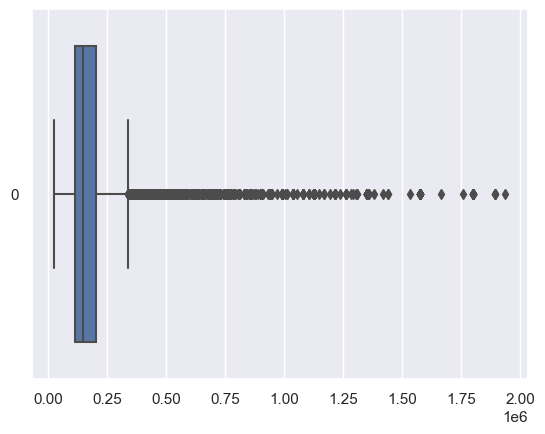

In [87]:
sns.boxplot(app[app.AMT_INCOME_TOTAL < 2000000]['AMT_INCOME_TOTAL'], orient='h')

##### The outlier in INCOME is justified, posssible a applicant is ultra rich

### 1.5.4 Binning the AMT_INCOME_TOTAL Column to INCOME GROUP Column

In [88]:
app['INCM_GROUP'] = pd.cut(app.AMT_INCOME_TOTAL, [0,100000,250000,500000,1000000,2500000,1000000000], labels=['LOWER Class','MODERATE Class ','Lower MIDDLE Class','MIDDLE Class','Upper MID Class','RICH Classes'])

In [89]:
app['INCM_GROUP'].value_counts()

INCM_GROUP
MODERATE Class        204035
LOWER Class            63698
Lower MIDDLE Class     37076
MIDDLE Class            2452
Upper MID Class          231
RICH Classes              19
Name: count, dtype: int64

In [90]:
null(app)

SumOf Null  MeanOf Null
AMT_ANNUITY                         12        0.004
AMT_GOODS_PRICE                    278        0.090
NAME_TYPE_SUITE                   1292        0.420
OWN_CAR_AGE                     202929       65.991
OCCUPATION_TYPE                  96391       31.346
CNT_FAM_MEMBERS                      2        0.001
ORGANIZATION_TYPE                55374       18.007
EXT_SOURCE_1                    173378       56.381
EXT_SOURCE_2                       660        0.215
EXT_SOURCE_3                     60965       19.825
OBS_30_CNT_SOCIAL_CIRCLE          1021        0.332
DEF_30_CNT_SOCIAL_CIRCLE          1021        0.332
OBS_60_CNT_SOCIAL_CIRCLE          1021        0.332
DEF_60_CNT_SOCIAL_CIRCLE          1021        0.332
DAYS_LAST_PHONE_CHANGE               1          NaN
AMT_REQ_CREDIT_BUREAU_HOUR       41519       13.502
AMT_REQ_CREDIT_BUREAU_DAY        41519       13.502
AMT_REQ_CREDIT_BUREAU_WEEK       41519       13.502
AMT_REQ_CREDIT_BUREAU_MON        41519       13.502
AMT_REQ_CREDIT_BUREAU_QRT        41519       13.502
AMT_REQ_CREDIT_BUREAU_YEAR       41519       13.502
EMPLOYMENT_YR                    55374       18.007
EMP_EXP_GROUP                    55376       18.008

### CNT_SOCIAL_CIRCLE nulls have to replaced by the mode because the risk score have to be generated and nulls can affect it.

In [91]:
app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].dtypes

OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

In [92]:
app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].mode()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                       0.0                       0.0

In [93]:
app['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace=True)
app['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace=True)
app['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace=True)
app['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace=True)


In [94]:
app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.417523                  0.142944   
std                    2.398395                  0.446033   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             307511.000000             307511.000000  
mean                   1.400626                  0.099717  
std                    2.377224                  0.361735  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [95]:
null(app)

SumOf Null  MeanOf Null
AMT_ANNUITY                         12        0.004
AMT_GOODS_PRICE                    278        0.090
NAME_TYPE_SUITE                   1292        0.420
OWN_CAR_AGE                     202929       65.991
OCCUPATION_TYPE                  96391       31.346
CNT_FAM_MEMBERS                      2        0.001
ORGANIZATION_TYPE                55374       18.007
EXT_SOURCE_1                    173378       56.381
EXT_SOURCE_2                       660        0.215
EXT_SOURCE_3                     60965       19.825
DAYS_LAST_PHONE_CHANGE               1          NaN
AMT_REQ_CREDIT_BUREAU_HOUR       41519       13.502
AMT_REQ_CREDIT_BUREAU_DAY        41519       13.502
AMT_REQ_CREDIT_BUREAU_WEEK       41519       13.502
AMT_REQ_CREDIT_BUREAU_MON        41519       13.502
AMT_REQ_CREDIT_BUREAU_QRT        41519       13.502
AMT_REQ_CREDIT_BUREAU_YEAR       41519       13.502
EMPLOYMENT_YR                    55374       18.007
EMP_EXP_GROUP                    55376       18.008

## 1.6 Checking the Missing values

In [96]:
# Calling function
null(app).head()

SumOf Null  MeanOf Null
AMT_ANNUITY              12        0.004
AMT_GOODS_PRICE         278        0.090
NAME_TYPE_SUITE        1292        0.420
OWN_CAR_AGE          202929       65.991
OCCUPATION_TYPE       96391       31.346

### 1.6.1 Checking the AMT_ANNUITY Column
https://www.youtube.com/watch?v=myWaSFYKQIA

In [97]:
#mean before
app.AMT_ANNUITY.mean()

27108.573909183444

In [98]:
app[app.AMT_ANNUITY.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans    Male            N   
50035       157917       0         Cash loans  Female            N   
51594       159744       0         Cash loans  Female            N   
55025       163757       0         Cash loans  Female            N   
59934       169487       0         Cash loans    Male            Y   
75873       187985       0         Cash loans    Male            Y   
89343       203726       0         Cash loans  Female            Y   
123872      243648       0         Cash loans  Female            N   
207186      340147       0         Cash loans    Male            N   
227939      364022       0         Cash loans  Female            N   
239329      377174       0         Cash loans  Female            N   
241835      379997       0         Cash loans  Female            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
47531    Incomplete higher  Single / not married    House / apartment   
50035      Lower secondary        Civil marriage    House / apartment   
51594     Secondary(Spcl*)               Married    House / apartment   
55025     Higher education               Married    House / apartment   
59934     Secondary(Spcl*)  Single / not married    House / apartment   
75873     Higher education  Single / not married     Rented apartment   
89343     Secondary(Spcl*)               Married    House / apartment   
123872    Secondary(Spcl*)        Civil marriage    House / apartment   
207186    Higher education               Married    House / apartment   
227939    Higher education               Married  Municipal apartment   
239329    Secondary(Spcl*)               Married    House / apartment   
241835    Higher education               Married    House / apartment   

        REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
47531                     0.026392          NaN                 1   
50035                     0.035792          NaN                 1   
51594         

only 12 raws and 0.0039% can be assumed as zero
[Could have been replcaed by external means with ANNUITY formula, data lacks the required fields]


In [99]:
app.AMT_ANNUITY = app.AMT_ANNUITY.fillna(0)

In [100]:
#mean differance should be same as the missing values ie. 0.0039
app.AMT_ANNUITY.mean()

27107.516051458322

In [101]:
#Checking Remaining Nulls
null(app).head()

SumOf Null  MeanOf Null
AMT_GOODS_PRICE         278        0.090
NAME_TYPE_SUITE        1292        0.420
OWN_CAR_AGE          202929       65.991
OCCUPATION_TYPE       96391       31.346
CNT_FAM_MEMBERS           2        0.001

### 1.6.2  Checking the  AMT_GOODS_PRICE

In [102]:
app[app.AMT_GOODS_PRICE.isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans  Female            N   
5937      106955       0    Revolving loans  Female            N   
6425      107494       0    Revolving loans  Female            N   
6703      107822       0    Revolving loans  Female            N   
7647      108913       0    Revolving loans    Male            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN             NaN  Commercial associate   
5937              NaN             NaN               Working   
6425              NaN             NaN               Working   
6703              NaN             NaN               Working   
7647              NaN             NaN               Working   

     NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724     Secondary(Spcl*)               Married  House / apartment   
5937    Secondary(Spcl*)               Married  House / apartment   
6425    Higher education               Married  House / apartment   
6703    Secondary(Spcl*)        Civil marriage  House / apartment   
7647    Higher education  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
724                     0.024610          NaN                 1   
5937                    0.010006          NaN                 1   
6425                    0.008474          NaN                 1   
6703                    0.011657          NaN                 1   
7647                    0.032561          NaN                 1   

            OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
724              Core staff              4.0                  WEDNESDAY   
5937  Private service staff              2.0                   SATURDAY   
6425            Accountants              2.0                  WEDNESDAY   
6703               Managers              3.0                  WEDNESDAY   
7647         Security staff              1.0                   SATURDAY   

      HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
724                        14         Education      0.358509      0.378174   
5937                       13          Business      0.505609      0.464614   
6425                       18             Trade      0.706945      0.565849   
6703                       11        Government           NaN      0.645519   
7647                       18      Construction      0.477288      0.552557   

      EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
724            NaN                       2.0                       1.0   
5937      0.537070                       0.0                       0.0   
6425           NaN                       1.0                       1.0   
6703      0.863363                       1.0                       0.0   
7647      0.661024                       1.0                       0.0   

      OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
724                        2.0                       1.0   
5937                       0.0                       0.0   
6425                       1.0                       0.0   
6703                       1.0                       0.0   
7647                       1.0                       0.0   

      DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
724                   2011.0                         NaN   
5937                   476.0                         0.0   
6

In [103]:
app.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

#### AMT_GOODS_PRICE has 278 raws and 0.090% can be assumed as zero

In [104]:

app.AMT_GOODS_PRICE.fillna(0, inplace=True)

### 1.6.3  Checking the  NAME_TYPE_SUITE

In [105]:
#Checking Remaining Nulls
null(app).head()

SumOf Null  MeanOf Null
NAME_TYPE_SUITE          1292        0.420
OWN_CAR_AGE            202929       65.991
OCCUPATION_TYPE         96391       31.346
CNT_FAM_MEMBERS             2        0.001
ORGANIZATION_TYPE       55374       18.007

In [106]:
app[app.NAME_TYPE_SUITE.isnull()].shape

(1292, 49)

In [107]:
app.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

##### The NAME_TYPE_SUITE values are 1292 with 0.420% of data, doesnt look like the clients were Accompanied, hence filling it with Unaccompanied which is also a mode value

#### Replacing the NAME_TYPE_SUITE Nulls with mode

In [108]:
mode = app.NAME_TYPE_SUITE.mode()

In [109]:
mode

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [110]:
app.NAME_TYPE_SUITE.fillna(mode[0], inplace=True)

In [111]:
1292 + 248526

249818

In [112]:
app.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

### 1.6.4 Checking the  DAYS_LAST_PHONE_CHANGE Column

In [113]:
app[app.DAYS_LAST_PHONE_CHANGE.isnull()]


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER FLAG_OWN_CAR  \
15709      118330       0         Cash loans   Male            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15709               Y             0          126000.0    278613.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
15709      25911.0         252000.0   Unaccompanied          Working   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15709   Incomplete higher            Married  House / apartment   

       REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
15709                    0.010643         21.0                 1   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
15709             NaN              2.0                     FRIDAY   

       HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
15709                       13             Trade           NaN           NaN   

       EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
15709           NaN                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
15709                     NaN                         NaN   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
15709                        NaN                         NaN   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
15709                        NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_YEAR  DOCS_SUBMITTED  REGION_RATING  \
15709                         NaN               2              4   

       RISK_ADDR_MM  CONTACT_PTS   AGE  EMPLOYMENT_YR  REGIST_YR  ID_PUB_YR  \
15709             0           24  24.0            1.0       14.0        3.0   

          AGE_GROUP EMP_EXP_GROUP       INCM_GROUP  
15709  Young Adults     New Hires  MODERATE Class

In [114]:
app.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### Updating DAYS_LAST_PHONE_CHANGE with 0 instead of null value, also 0 is the mode

In [115]:
mode =app.DAYS_LAST_PHONE_CHANGE.mode()[0]
app.DAYS_LAST_PHONE_CHANGE.mode()[0]

0.0

In [116]:
app.DAYS_LAST_PHONE_CHANGE = app.DAYS_LAST_PHONE_CHANGE.replace(np.NaN, mode)

In [117]:
app.DAYS_LAST_PHONE_CHANGE.value_counts()[0]

37673

In [118]:
null(app)

SumOf Null  MeanOf Null
OWN_CAR_AGE                     202929       65.991
OCCUPATION_TYPE                  96391       31.346
CNT_FAM_MEMBERS                      2        0.001
ORGANIZATION_TYPE                55374       18.007
EXT_SOURCE_1                    173378       56.381
EXT_SOURCE_2                       660        0.215
EXT_SOURCE_3                     60965       19.825
AMT_REQ_CREDIT_BUREAU_HOUR       41519       13.502
AMT_REQ_CREDIT_BUREAU_DAY        41519       13.502
AMT_REQ_CREDIT_BUREAU_WEEK       41519       13.502
AMT_REQ_CREDIT_BUREAU_MON        41519       13.502
AMT_REQ_CREDIT_BUREAU_QRT        41519       13.502
AMT_REQ_CREDIT_BUREAU_YEAR       41519       13.502
EMPLOYMENT_YR                    55374       18.007
EMP_EXP_GROUP                    55376       18.008

## 1.7 Sanity Check

In [119]:
null(app).head()

SumOf Null  MeanOf Null
OWN_CAR_AGE            202929       65.991
OCCUPATION_TYPE         96391       31.346
CNT_FAM_MEMBERS             2        0.001
ORGANIZATION_TYPE       55374       18.007
EXT_SOURCE_1           173378       56.381

### 1.7.1 Sanity Check on OWN_CAR_AGE Column

In [120]:
app[app.OWN_CAR_AGE.isnull()].head(100)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans    Male            N   
1        100003       0         Cash loans  Female            N   
3        100006       0         Cash loans  Female            N   
4        100007       0         Cash loans    Male            N   
5        100008       0         Cash loans    Male            N   
..          ...     ...                ...     ...          ...   
135      100157       0         Cash loans    Male            N   
136      100158       0         Cash loans    Male            N   
137      100159       0         Cash loans  Female            N   
138      100160       1         Cash loans    Male            N   
139      100161       0         Cash loans  Female            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 Y             0          202500.0    406597.5      24700.5   
1                 N             0          270000.0   1293502.5      35698.5   
3                 Y             0          135000.0    312682.5      29686.5   
4                 Y             0          121500.0    513000.0      21865.5   
5                 Y             0           99000.0    490495.5      27517.5   
..              ...           ...               ...         ...          ...   
135               Y             0          180000.0   1755000.0      61132.5   
136               N             0          180000.0    590337.0      27486.0   
137               Y             0          225000.0   1515415.5      41800.5   
138               Y             0          292500.0    675000.0      36747.0   
139               Y             0           90000.0    370629.0      13972.5   

     AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           351000.0    Unaccompanied               Working   
1          1129500.0           Family         State servant   
3           297000.0    Unaccompanied               Working   
4           513000.0    Unaccompanied               Working   
5           454500.0  Spouse, partner         State servant   
..               ...              ...                   ...   
135        1755000.0    Unaccompanied               Working   
136         477000.0    Unaccompanied  Commercial associate   
137        1354500.0    Unaccompanied  Commercial associate   
138         675000.0    Unaccompanied               Working   
139         306000.0           Family  Commercial associate   

    NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0      Secondary(Spcl*)  Single / not married  House / apartment   
1      Higher education               Married  House / apartment   
3      Secondary(Spcl*)        Civil marriage  House / apartment   
4      Secondary(Spcl*)  Single / not married  House / apartment   
5      Secondary(Spcl*)               Married  House / apartment   
..                  ...                   ...                ...   
135    Secondary(Spcl*)               Married  House / apartment   
136   Incomplete higher               Married  House / apartment   
137    Secondary(Spcl*)               Married  House / apartment   
138    Higher education               Married  House / apartment   
139    Secondary(Spcl*)               Married  House / apartment   

     REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
0                      0.018801          NaN                 1   
1                      0.003541          NaN                 1   
3                      0.008019          NaN                 1   
4                      0.028663          NaN                 1   
5                      0.035792          NaN                 1   
..                          ...          ...               ...   
135                    0.014520          NaN                 1   
136                    0.022800          NaN                 1   
137                    0.003818          NaN                 1   
138  

In [121]:
app.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

However, it looks like we have extra Nulls 202929 - 202924 = 5, againt the clinets not owning car.. 
checking if the 5 nulls has

In [122]:
app['OWN_CAR_AGE'].isnull()[~(app["FLAG_OWN_CAR"] =='N')].value_counts()

OWN_CAR_AGE
False    104582
True          5
Name: count, dtype: int64

We have 5 True values that means those null belong to the FLAG_OWN_CAR only

In [123]:
null(app)

SumOf Null  MeanOf Null
OWN_CAR_AGE                     202929       65.991
OCCUPATION_TYPE                  96391       31.346
CNT_FAM_MEMBERS                      2        0.001
ORGANIZATION_TYPE                55374       18.007
EXT_SOURCE_1                    173378       56.381
EXT_SOURCE_2                       660        0.215
EXT_SOURCE_3                     60965       19.825
AMT_REQ_CREDIT_BUREAU_HOUR       41519       13.502
AMT_REQ_CREDIT_BUREAU_DAY        41519       13.502
AMT_REQ_CREDIT_BUREAU_WEEK       41519       13.502
AMT_REQ_CREDIT_BUREAU_MON        41519       13.502
AMT_REQ_CREDIT_BUREAU_QRT        41519       13.502
AMT_REQ_CREDIT_BUREAU_YEAR       41519       13.502
EMPLOYMENT_YR                    55374       18.007
EMP_EXP_GROUP                    55376       18.008

In [124]:
app[app.OCCUPATION_TYPE.isnull()].head(100)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  GENDER FLAG_OWN_CAR  \
8        100011       0         Cash loans  Female            N   
11       100015       0         Cash loans  Female            N   
23       100027       0         Cash loans  Female            N   
28       100033       0         Cash loans    Male            Y   
30       100035       0         Cash loans  Female            N   
..          ...     ...                ...     ...          ...   
352      100406       0         Cash loans  Female            N   
359      100413       0         Cash loans    Male            N   
364      100419       0         Cash loans  Female            N   
378      100435       0         Cash loans  Female            N   
380      100437       0         Cash loans  Female            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                 Y             0        112500.000   1019610.0      33826.5   
11                Y             0         38419.155    148365.0      10678.5   
23                Y             0         83250.000    239850.0      23850.0   
28                Y             0        270000.000    790830.0      57676.5   
30                Y             0        292500.000    665892.0      24592.5   
..              ...           ...               ...         ...          ...   
352               Y             0        135000.000    468648.0      34101.0   
359               Y             0         90000.000     90000.0       9351.0   
364               Y             0        112500.000    454500.0      13419.0   
378               Y             0        112500.000    450000.0      16294.5   
380               Y             1         67500.000    817560.0      30951.0   

     AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
8           913500.0         Children             Pensioner   
11          135000.0         Children             Pensioner   
23          225000.0    Unaccompanied             Pensioner   
28          675000.0    Unaccompanied         State servant   
30          477000.0    Unaccompanied  Commercial associate   
..               ...              ...                   ...   
352         414000.0    Unaccompanied             Pensioner   
359          90000.0  Spouse, partner             Pensioner   
364         454500.0    Unaccompanied             Pensioner   
378         450000.0    Unaccompanied  Commercial associate   
380         675000.0    Unaccompanied             Pensioner   

    NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8      Secondary(Spcl*)               Married  House / apartment   
11     Secondary(Spcl*)               Married  House / apartment   
23     Secondary(Spcl*)               Married  House / apartment   
28     Higher education  Single / not married  House / apartment   
30     Secondary(Spcl*)        Civil marriage  House / apartment   
..                  ...                   ...                ...   
352    Secondary(Spcl*)               Married  House / apartment   
359    Secondary(Spcl*)               Married  House / apartment   
364    Secondary(Spcl*)             Separated  House / apartment   
378    Secondary(Spcl*)             Separated  House / apartment   
380    Secondary(Spcl*)               Married  House / apartment   

     REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
8                      0.018634          NaN                 1   
11                     0.015221          NaN                 1   
23                     0.006296          NaN                 1   
28                     0.046220          1.0                 1   
30                     0.025164          NaN                 1   
..                          ...          ...               ...   
352                    0.010006          NaN                 1   
359                    0.019101          NaN                 1   
364                    0.031329          NaN                 1   
378  

In [125]:
app.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [126]:
app.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

##### Only comparable column is the NAME_INCOME_TYPE, however there are no matching occupation type, hence leaving it as it is CNT_FAM_MEMBERS is negligible

###  1.7.2 Checking the CNT_FAM_MEMBERS Column

In [127]:
col_info('CNT_FAM_MEMBERS')

29    How many family members does client have
Name: Description, dtype: object

In [128]:
app[app.CNT_FAM_MEMBERS.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans    Male            N   
187348      317181       0    Revolving loans  Female            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              0.0   Unaccompanied  Commercial associate   
187348      29250.0              0.0   Unaccompanied  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
41982                     0.015221          NaN                 1   
187348                    0.031329          NaN                 1   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
41982         Managers              NaN                   THURSDAY   
187348     Accountants              NaN                     FRIDAY   

        HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
41982                        15             Other      0.628564      0.700618   
187348                       14          Business           NaN      0.645168   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                       3.0                       0.0   
187348      0.670652                       1.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                        3.0                       0.0   
187348                       1.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
41982                    876.0                         NaN   
187348                   654.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
41982                         NaN                         NaN   
187348                        0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
41982                         NaN                        NaN   
187348                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  DOCS_SUBMITTED  REGION_RATING  \
41982                          NaN               1              4   
187348                         1.0               1              4   

        RISK_ADDR_MM  CONTACT_PTS   AGE  EMPLOYMENT_YR  REGIST_YR  ID_PUB_YR  \
41982              4           44  34.0            4.0        9.0       13.0   
187348             0           30  36.0            1.0        5.0        5.0   

       AGE_GROUP EMP_EXP_GROUP          INCM_GROUP  
41982   Thirties       1-5 Yrs  Lower MIDDLE Class  
187348  Thirties     New Hires     MODERATE Class

In [129]:
app.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [130]:
app.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

##### Updating the Column NAME_FAMILY_STATUS where unknowns are 2, same clients that has null  value on  CNT_FAM_MEMBERS

Updating with null as it will disturb while plotting graphs

In [131]:
app.NAME_FAMILY_STATUS = app.NAME_FAMILY_STATUS.replace('Unknown', np.NaN)

##### Updating the Column CNT_FAM_MEMBERS with two nulls as the family would have atleast one member ie client him/herself.

In [132]:
app.CNT_FAM_MEMBERS.fillna(1, inplace=True)

In [133]:
app.CNT_FAM_MEMBERS.value_counts()[1.0]

67849

In [134]:
null(app)

SumOf Null  MeanOf Null
NAME_FAMILY_STATUS                   2        0.001
OWN_CAR_AGE                     202929       65.991
OCCUPATION_TYPE                  96391       31.346
ORGANIZATION_TYPE                55374       18.007
EXT_SOURCE_1                    173378       56.381
EXT_SOURCE_2                       660        0.215
EXT_SOURCE_3                     60965       19.825
AMT_REQ_CREDIT_BUREAU_HOUR       41519       13.502
AMT_REQ_CREDIT_BUREAU_DAY        41519       13.502
AMT_REQ_CREDIT_BUREAU_WEEK       41519       13.502
AMT_REQ_CREDIT_BUREAU_MON        41519       13.502
AMT_REQ_CREDIT_BUREAU_QRT        41519       13.502
AMT_REQ_CREDIT_BUREAU_YEAR       41519       13.502
EMPLOYMENT_YR                    55374       18.007
EMP_EXP_GROUP                    55376       18.008

### 1.7.3 Checking for outliers for the 5 columns that has common standard - years

In [135]:
app[['OWN_CAR_AGE','AGE','EMPLOYMENT_YR','REGIST_YR','ID_PUB_YR']].describe()

OWN_CAR_AGE            AGE  EMPLOYMENT_YR      REGIST_YR  \
count  104582.000000  307511.000000  252137.000000  307511.000000   
mean       12.061091      44.405442       7.031975      14.157962   
std        11.944812      11.945936       6.411798       9.640678   
min         0.000000      21.000000       0.000000       0.000000   
25%         5.000000      34.000000       3.000000       6.000000   
50%         9.000000      44.000000       5.000000      13.000000   
75%        15.000000      54.000000       9.000000      21.000000   
max        91.000000      70.000000      50.000000      68.000000   

           ID_PUB_YR  
count  307511.000000  
mean        8.706352  
std         4.131512  
min         0.000000  
25%         5.000000  
50%         9.000000  
75%        12.000000  
max        20.000000

In [136]:
app.OWN_CAR_AGE.describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [137]:
app[app.OWN_CAR_AGE ==91.0]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER FLAG_OWN_CAR  \
271741      415025       1         Cash loans   Male            Y   
294131      440757       0    Revolving loans   Male            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
271741               Y             1          180000.0    675000.0   
294131               N             1          112500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
271741      34465.5         675000.0   Unaccompanied          Working   
294131       9000.0         180000.0          Family          Working   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
271741    Secondary(Spcl*)            Married       With parents   
294131    Secondary(Spcl*)            Married  House / apartment   

        REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_CONT_MOBILE  \
271741                    0.018209         91.0                 1   
294131                    0.018850         91.0                 1   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
271741         Drivers              3.0                    TUESDAY   
294131         Drivers              3.0                  WEDNESDAY   

        HOUR_APPR_PROCESS_START ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
271741                       13          Business           NaN      0.523138   
294131                       14          Industry           NaN      0.686340   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
271741      0.133429                       1.0                       1.0   
294131      0.794629                      19.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
271741                       1.0                       1.0   
294131                      19.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
271741                   688.0                         0.0   
294131                  2352.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
271741                        0.0                         0.0   
294131                        0.0                         1.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
271741                        0.0                        0.0   
294131                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  DOCS_SUBMITTED  REGION_RATING  \
271741                         4.0               1              6   
294131                         2.0               0              4   

        RISK_ADDR_MM  CONTACT_PTS   AGE  EMPLOYMENT_YR  REGIST_YR  ID_PUB_YR  \
271741             0           44  28.0            4.0       13.0        8.0   
294131             0           30  31.0            3.0       10.0       11.0   

           AGE_GROUP EMP_EXP_GROUP       INCM_GROUP  
271741  Young Adults       1-5 Yrs  MODERATE Class   
294131      Thirties       1-5 Yrs  MODERATE Class

#### Looks like there is a possibility that 2 customers would have antique cars.

### 1.7.4 Check on Childeren & Family Member Column

In [138]:
app['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [139]:
app[app['CNT_CHILDREN']>12][['CNT_CHILDREN','CNT_FAM_MEMBERS']]

CNT_CHILDREN  CNT_FAM_MEMBERS
155369            19             20.0
176011            14             15.0
183878            14             16.0
265784            19             20.0
267998            14             16.0

### Possibility is the childers could be adapted(ex. Orphange house) also it won't affect the overall analysis

In [140]:
null(app)

SumOf Null  MeanOf Null
NAME_FAMILY_STATUS                   2        0.001
OWN_CAR_AGE                     202929       65.991
OCCUPATION_TYPE                  96391       31.346
ORGANIZATION_TYPE                55374       18.007
EXT_SOURCE_1                    173378       56.381
EXT_SOURCE_2                       660        0.215
EXT_SOURCE_3                     60965       19.825
AMT_REQ_CREDIT_BUREAU_HOUR       41519       13.502
AMT_REQ_CREDIT_BUREAU_DAY        41519       13.502
AMT_REQ_CREDIT_BUREAU_WEEK       41519       13.502
AMT_REQ_CREDIT_BUREAU_MON        41519       13.502
AMT_REQ_CREDIT_BUREAU_QRT        41519       13.502
AMT_REQ_CREDIT_BUREAU_YEAR       41519       13.502
EMPLOYMENT_YR                    55374       18.007
EMP_EXP_GROUP                    55376       18.008

### 1.7.5 Check Currency Columns

#### Checking 4 columns that has common standard (Currency INR) amount


<Axes: >

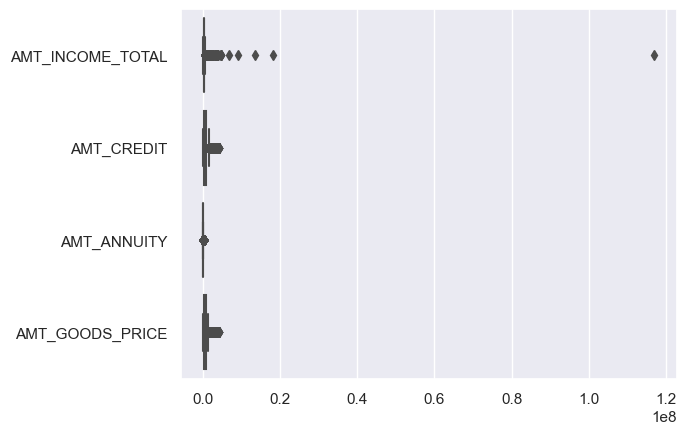

In [141]:
sns.boxplot(app[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']],orient='h')



#### Looks like the INCOME has ouliers

#### There is a possibility that the apllicant is ultra rich

### 1.8 Filter Data

#### 1.8.1 Checking EXT_SOURCE of '3' Columns

Scores from external sources are significantly important, hence dropping would not be a good choice.

Merginging the scores into one Column can be considered. It will also decrese the amount of nulls.

Taking avg by deviding by 3 would be a wrong methods, as that will not show the correct normalized data
Hence it better to get the mean, because it will not include the null while calulation the average

In [142]:
# WRONG WAY
# app[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].sum(axis=1)/3
# RIGHT WAY
# app[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

##### Creating new Column EXT_SOURCE that will have avg of all three sources

In [143]:
app['EXTERNAL_SCORE'] = app[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [144]:
app['EXTERNAL_SCORE'].describe()

count    307339.000000
mean          0.509251
std           0.149802
min           0.000006
25%           0.413648
50%           0.524502
75%           0.622819
max           0.878903
Name: EXTERNAL_SCORE, dtype: float64

Now we have less null remaining comparetively . And the description also doesnt shows any outliers. Now we can replace the nulls by mean.

In [145]:
mean= app['EXTERNAL_SCORE'].describe()['mean']

In [146]:
app['EXTERNAL_SCORE'].fillna(mean, inplace=True)


In [147]:
null(app)

SumOf Null  MeanOf Null
NAME_FAMILY_STATUS                   2        0.001
OWN_CAR_AGE                     202929       65.991
OCCUPATION_TYPE                  96391       31.346
ORGANIZATION_TYPE                55374       18.007
EXT_SOURCE_1                    173378       56.381
EXT_SOURCE_2                       660        0.215
EXT_SOURCE_3                     60965       19.825
AMT_REQ_CREDIT_BUREAU_HOUR       41519       13.502
AMT_REQ_CREDIT_BUREAU_DAY        41519       13.502
AMT_REQ_CREDIT_BUREAU_WEEK       41519       13.502
AMT_REQ_CREDIT_BUREAU_MON        41519       13.502
AMT_REQ_CREDIT_BUREAU_QRT        41519       13.502
AMT_REQ_CREDIT_BUREAU_YEAR       41519       13.502
EMPLOYMENT_YR                    55374       18.007
EMP_EXP_GROUP                    55376       18.008

##### Deleting the three EXT_SOURCE Columns

In [148]:
app.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],axis=1, inplace=True)

#### 1.8.2 Generating the AMT_REQ_CREDIT_BUREAU considering the risk points 

In [149]:
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [150]:
app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.0, inplace=True)
app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0.0, inplace=True)
app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0.0, inplace=True)
app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.0, inplace=True)
app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.0, inplace=True)
app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0.0, inplace=True)



##### docs doesnt mention the type of inquiry! hence considering it a hard inquiry

In [151]:
app['RISK_CR_BUREAU'] = app.AMT_REQ_CREDIT_BUREAU_HOUR*50 +app.AMT_REQ_CREDIT_BUREAU_DAY*30 + app.AMT_REQ_CREDIT_BUREAU_WEEK*20 + app.AMT_REQ_CREDIT_BUREAU_MON*5 + app.AMT_REQ_CREDIT_BUREAU_QRT*3 +app.AMT_REQ_CREDIT_BUREAU_YEAR*2

In [152]:
app['RISK_CR_BUREAU'].describe()

count    307511.000000
mean          6.185252
std           9.560140
min           0.000000
25%           0.000000
50%           4.000000
75%           8.000000
max         788.000000
Name: RISK_CR_BUREAU, dtype: float64

##### DRopping 6 AMT_REQ_CREDIT_BUREAU  Columns

In [153]:
app.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

#### Observing OBS_DEF columns

#### 1.8.3 Generating the RISK_SOCIAL considering defaulter around

the higher the amount of  Defaults in surrounding is a  bad sign. Nulls are already replaced

In [154]:
app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [155]:
app[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.417523                  0.142944   
std                    2.398395                  0.446033   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             307511.000000             307511.000000  
mean                   1.400626                  0.099717  
std                    2.377224                  0.361735  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [156]:
def_30_per = app.DEF_30_CNT_SOCIAL_CIRCLE/ app.OBS_30_CNT_SOCIAL_CIRCLE*100
def_60_per = app.DEF_60_CNT_SOCIAL_CIRCLE/ app.OBS_60_CNT_SOCIAL_CIRCLE*100

In [157]:
app['RISK_DEF_30'] = def_30_per
app['RISK_DEF_60'] = def_60_per*2

In [158]:
app['RISK_DEF_30'].describe()

count    142580.000000
mean         14.393952
std          29.948476
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: RISK_DEF_30, dtype: float64

In [159]:
app['RISK_DEF_60'].describe()

count    141824.000000
mean         21.804504
std          54.091685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         200.000000
Name: RISK_DEF_60, dtype: float64

##### Replacing the nulls with 0, as the columns has no risk( in pts)

In [160]:
app.RISK_DEF_60.replace(np.NaN, 0.0, inplace=True)
app.RISK_DEF_30.replace(np.NaN, 0.0, inplace=True)

In [161]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'FLAG_CONT_MOBILE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'DOCS_SUBMITTED', 'REGION_RATING',
       'RISK_ADDR_MM', 'CONTACT_PTS', 'AGE', 'EMPLOYMENT_YR', 'REGIST_YR',
       'ID_PUB_YR', 'AGE_GROUP', 'EMP_EXP_GROUP', 'INCM_GROUP',
       'EXTERNAL_SCORE', 'RISK_CR_BUREAU', 'RISK_DEF_30', 'RISK_DEF_60'],
      dtype='object')

#### 1.8.4 Deleting the remaining unwante column after general analysis

In [162]:
app.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
          'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',],axis=1, inplace=True)

### GENERATING INTERNAL CREDIT SCORE with factors including -

In [163]:
app.shape

(307511, 38)

In [164]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'FLAG_CONT_MOBILE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'DOCS_SUBMITTED', 'REGION_RATING',
       'RISK_ADDR_MM', 'CONTACT_PTS', 'AGE', 'EMPLOYMENT_YR', 'REGIST_YR',
       'ID_PUB_YR', 'AGE_GROUP', 'EMP_EXP_GROUP', 'INCM_GROUP',
       'EXTERNAL_SCORE', 'RISK_CR_BUREAU', 'RISK_DEF_30', 'RISK_DEF_60'],
      dtype='object')

#### Crating INTERNAL_SCORE COLUMN, based upon the factors available, standating the 550 pts. ranging (0-1000)

In [165]:
app['PHONE_CHANGE_YR'] = app.DAYS_LAST_PHONE_CHANGE.apply(lambda x: x/365.243)

In [166]:
app.PHONE_CHANGE_YR.describe()

count    307511.000000
mean          2.636206
std           2.263723
min           0.000000
25%           0.750185
50%           2.072593
75%           4.298508
max          11.751081
Name: PHONE_CHANGE_YR, dtype: float64

In [167]:
app['INT_SCORE'] = 550 +app.REGION_RATING*30  -app.RISK_ADDR_MM -app.RISK_CR_BUREAU +app.CONTACT_PTS -app.RISK_DEF_30 -app.RISK_DEF_60 + app.PHONE_CHANGE_YR*10 + app.DOCS_SUBMITTED*10

In [168]:
app['INT_SCORE'].describe()

count    307511.000000
mean        717.600374
std          69.791593
min         -54.971572
25%         704.542258
50%         725.145081
75%         755.795424
max         885.606251
Name: INT_SCORE, dtype: float64

<Axes: >

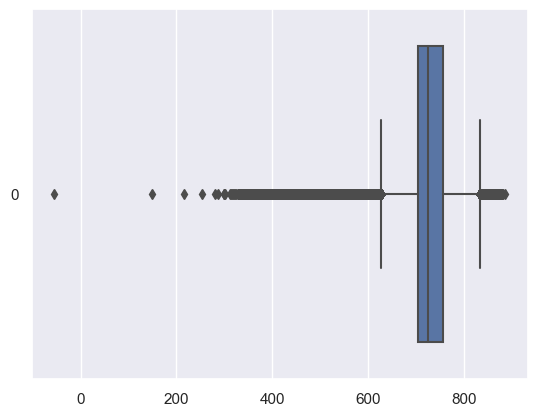

In [169]:
sns.boxplot(app['INT_SCORE'], orient='h')

### Eliminating the risk score columns, as the data is already considered

In [170]:
app.drop(['RISK_ADDR_MM','RISK_CR_BUREAU','RISK_DEF_30','RISK_DEF_60','PHONE_CHANGE_YR','CONTACT_PTS','DOCS_SUBMITTED','DAYS_LAST_PHONE_CHANGE','FLAG_CONT_MOBILE'], axis=1, inplace=True)

In [171]:
app.shape

(307511, 31)

In [172]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'REGION_RATING', 'AGE',
       'EMPLOYMENT_YR', 'REGIST_YR', 'ID_PUB_YR', 'AGE_GROUP', 'EMP_EXP_GROUP',
       'INCM_GROUP', 'EXTERNAL_SCORE', 'INT_SCORE'],
      dtype='object')

### Setting Target Values ( Better for EDA)

### Defining TARGET BY 'Difficult' & 'notDifficult'

In [173]:
app['PAY_DIFF'] = app.TARGET.apply(lambda x: 'notPaid' if x==1 else 'Paid')

### Defining nTARGET(non-Target) as  0 in  ie. clients with no difficulties

In [174]:
app['nTARGET'] = app.TARGET.apply(lambda x: 0 if x==1 else 1)

# ######################__previous_application__###################

In [175]:
prev.shape

(1670214, 37)

In [176]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## 1.10 DATA CLEANING

### 1.11 CHECKING FOR DUPLICATES

In [177]:
app.SK_ID_CURR.nunique()

307511

In [178]:
prev.SK_ID_CURR.nunique()

338857

### Filtering  1670214 -SK_ID_CURR keeping the 'last' ID only, i.e eliminating the duplicated

In [179]:
prev.drop_duplicates(subset='SK_ID_CURR',  keep='last', inplace=True, ignore_index=False)

In [180]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### 1.12 Analysis on Categorical data

In [181]:
list_cat =['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION']

In [182]:
for i in list_cat:
    print(prev[i].value_counts(normalize=True)*100)
    print('\n')

NAME_CONTRACT_TYPE
Consumer loans     57.433667
Cash loans         32.487155
Revolving loans    10.062357
XNA                 0.016821
Name: proportion, dtype: float64


NAME_CASH_LOAN_PURPOSE
XAP                                 67.512845
XNA                                 29.081884
Repairs                              1.150338
Other                                0.754005
Urgent needs                         0.440599
Buying a used car                    0.134570
Everyday expenses                    0.130734
Building a house or an annex         0.121585
Medicine                             0.108010
Education                            0.084992
Journey                              0.068465
Purchase of electronic equipment     0.063449
Payments on other loans              0.062268
Wedding / gift / holiday             0.048988
Car repairs                          0.048693
Buying a new car                     0.042201
Furniture                            0.041315
Buying a home            

#### 1.12.1  'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START' has no use hence need wo be removed

#### 1.12.2  NAME_CONTRACT_TYPE has only 52 XNA m replacing with Nulls!         


In [183]:
prev.NAME_CONTRACT_TYPE.replace('XNA', np.NaN, inplace=True)

#### 1.12.3 NAME_CASH_LOAN_PURPOSE has high numbers of XNA, XAP inva;id entries, 68%+27%, hence have to drop the column.

#### 1.12.4 NAME_PAYMENT_TYPE has high number of XNA -invalid entries, eliminating it would have 'Cash through the bank' as ~99%, hence better to drop the colums

#### 1.12.5 CODE_REJECT_REASON, with XAP,XNA has to be replace by nulls, as it is only applicable to the rejecting, hence even 5% of data is important.

In [184]:
prev.CODE_REJECT_REASON.replace(['XAP','XNA'], np.NaN, inplace=True)

In [185]:
prev.CODE_REJECT_REASON.value_counts()

CODE_REJECT_REASON
HC        20808
LIMIT      8394
SCO        5624
CLIENT     4917
SCOFR      1957
VERIF       495
SYSTEM       93
Name: count, dtype: int64

#### 1.12.6 NAME_CLIENT_TYPE with XNA has to be replace by nulls,

In [186]:
prev.NAME_CLIENT_TYPE.replace('XNA', np.NaN, inplace=True)

In [187]:
prev.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     187633
New          116933
Refreshed     33919
Name: count, dtype: int64

#### 1.12.7 NAME_GOODS_CATEGORY only valid entries for good type loan, hence eliminating the XNA only

In [188]:
prev.NAME_GOODS_CATEGORY.replace('XNA', np.NaN, inplace=True)

In [189]:
prev.NAME_GOODS_CATEGORY.value_counts()

NAME_GOODS_CATEGORY
Mobile                      57906
Consumer Electronics        32096
Computers                   28543
Audio/Video                 25939
Furniture                   15669
Construction Materials       7383
Clothing and Accessories     7258
Photo / Cinema Equipment     6117
Auto Accessories             1968
Jewelry                      1684
Homewares                    1672
Medical Supplies             1419
Vehicles                     1073
Sport and Leisure             847
Gardening                     832
Medicine                      596
Tourism                       588
Office Appliances             574
Other                         568
Direct Sales                  154
Fitness                        99
Education                      47
Additional Service             28
Weapon                         19
Insurance                      14
Name: count, dtype: int64

#### 1.12.8 NAME_PORTFOLIO has 15% of invalid entries, replacing them with nulls

In [190]:
prev.NAME_PORTFOLIO.replace('XNA', np.NaN, inplace=True)

#### 1.12.9 NAME_PRODUCT_TYPE has high number of invalid entries hence, removing the column.

#### 1.12.10 SELLERPLACE_AREA is of no use, removing the clumn

#### 1.12.11 NAME_YIELD_GROUP has XNA enties, can be replace by NaN    

In [191]:
 prev.NAME_YIELD_GROUP.replace('XNA', np.NaN, inplace=True)

#### 1.12.2 NAME_SELLER_INDUSTRY has more than 30% of data is 'XNA'  , hence it better to drop thsi columns. aslo there is sufficient data in the application relate to the nature of businesses.


In [192]:
prev.NAME_PORTFOLIO.replace('XNA', np.NaN, inplace=True)

###  1.13 Below is the list of columns needed to deleted from above analysis.

In [193]:
prev.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
            'NAME_SELLER_INDUSTRY',
            'NAME_CASH_LOAN_PURPOSE',
            'NAME_PAYMENT_TYPE',
            'NAME_PRODUCT_TYPE',
            'SELLERPLACE_AREA'            
          ],axis=1, inplace=True
         )

In [194]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### 1.13 Below is the list of columns needed to deleted because not required.

In [195]:
prev.drop([ 'DAYS_DECISION','DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION'
          ],axis=1, inplace=True
         )

In [196]:
prev.shape

(338857, 24)

In [197]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### 1.14 Analysis on numerical data before combining the data frames.

<Axes: >

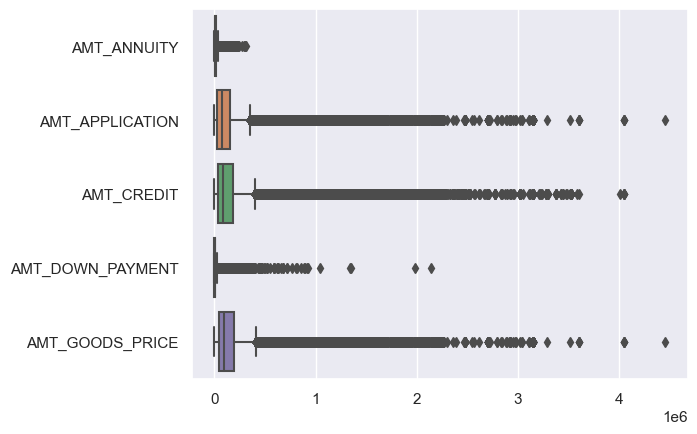

In [198]:
sns.boxplot(prev[['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']], orient='h')

<Axes: >

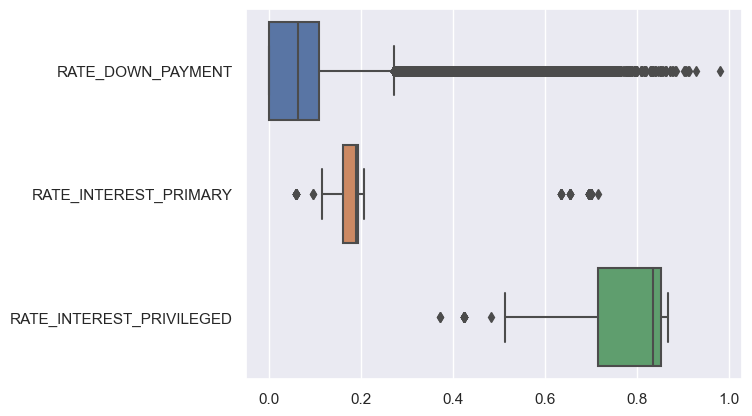

In [199]:
sns.boxplot(prev[['RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'
                 ]],orient='h')

In [200]:
prev.CNT_PAYMENT.describe()

count    286038.000000
mean         14.273796
std          12.480850
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

### 4. Merging the two data frames

In [201]:
final= pd.merge(app, prev,how='left', on='SK_ID_CURR')

In [202]:
final.shape

(307511, 56)

In [203]:
final.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x  GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans    Male            N   
1      100003       0           Cash loans  Female            N   
2      100004       0      Revolving loans    Male            Y   
3      100006       0           Cash loans  Female            N   
4      100007       0           Cash loans    Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2         6750.0           135000.0     Unaccompanied          Working   
3        29686.5           297000.0     Unaccompanied          Working   
4        21865.5           513000.0     Unaccompanied          Working   

  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0    Secondary(Spcl*)  Single / not married  House / apartment   
1    Higher education               Married  House / apartment   
2    Secondary(Spcl*)  Single / not married  House / apartment   
3    Secondary(Spcl*)        Civil marriage  House / apartment   
4    Secondary(Spcl*)  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801          NaN        Laborers              1.0   
1                    0.003541          NaN      Core staff              2.0   
2                    0.010032         26.0        Laborers              1.0   
3                    0.008019          NaN        Laborers              2.0   
4                    0.028663          NaN      Core staff              1.0   

  ORGANIZATION_TYPE  REGION_RATING   AGE  EMPLOYMENT_YR  REGIST_YR  ID_PUB_YR  \
0          Business              4  26.0            2.0       10.0        6.0   
1         Education              2  46.0            4.0        4.0        1.0   
2        Government              4  53.0            1.0       12.0        7.0   
3          Business              4  53.0            9.0       27.0        7.0   
4             Other              4  55.0            9.0       12.0       10.0   

      AGE_GROUP EMP_EXP_GROUP          INCM_GROUP  EXTERNAL_SCORE   INT_SCORE  \
0  Young Adults       1-5 Yrs     MODERATE Class         0.161787  443.047823   
1      Fourties       1-5 Yrs  Lower MIDDLE Class        0.466757  676.669839   
2       Fifties     New Hires         LOWER Class        0.642739  736.313912   
3       Fifties      5-10 Yrs     MODERATE Class         0.650442  726.892863   
4       Fifties      5-10 Yrs     MODERATE Class         0.322738  738.281210   

  PAY_DIFF  nTARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
0  notPaid        0   1038818.0       Consumer loans       9251.775   
1     Paid        1   2396755.0       Consumer loans       6737.310   
2     Paid        1   1564014.0       Consumer loans       5357.250   
3     Paid        1   1697039.0           Cash loans      32696.100   
4     Paid        1   1940724.0           Cash loans      22678.785   

   AMT_APPLICATION  AMT_CREDIT_y  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_y  \
0         179055.0      179055.0               0.0           179055.0   
1          68809.5       68053.5            6885.0            68809.5   
2          24282.0       20106.0            4860.0            24282.0   
3         688500.0      906615.0               NaN           688500.0   
4         202500.0      215865.0               NaN           202500.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAS

In [204]:
final.NAME_CONTRACT_TYPE_y.value_counts()

NAME_CONTRACT_TYPE_y
Consumer loans     168447
Cash loans          93718
Revolving loans     28839
Name: count, dtype: int64

In [205]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [206]:
final.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x  GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans    Male            N   
1      100003       0           Cash loans  Female            N   
2      100004       0      Revolving loans    Male            Y   
3      100006       0           Cash loans  Female            N   
4      100007       0           Cash loans    Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2         6750.0           135000.0     Unaccompanied          Working   
3        29686.5           297000.0     Unaccompanied          Working   
4        21865.5           513000.0     Unaccompanied          Working   

  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0    Secondary(Spcl*)  Single / not married  House / apartment   
1    Higher education               Married  House / apartment   
2    Secondary(Spcl*)  Single / not married  House / apartment   
3    Secondary(Spcl*)        Civil marriage  House / apartment   
4    Secondary(Spcl*)  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801          NaN        Laborers              1.0   
1                    0.003541          NaN      Core staff              2.0   
2                    0.010032         26.0        Laborers              1.0   
3                    0.008019          NaN        Laborers              2.0   
4                    0.028663          NaN      Core staff              1.0   

  ORGANIZATION_TYPE  REGION_RATING   AGE  EMPLOYMENT_YR  REGIST_YR  ID_PUB_YR  \
0          Business              4  26.0            2.0       10.0        6.0   
1         Education              2  46.0            4.0        4.0        1.0   
2        Government              4  53.0            1.0       12.0        7.0   
3          Business              4  53.0            9.0       27.0        7.0   
4             Other              4  55.0            9.0       12.0       10.0   

      AGE_GROUP EMP_EXP_GROUP          INCM_GROUP  EXTERNAL_SCORE   INT_SCORE  \
0  Young Adults       1-5 Yrs     MODERATE Class         0.161787  443.047823   
1      Fourties       1-5 Yrs  Lower MIDDLE Class        0.466757  676.669839   
2       Fifties     New Hires         LOWER Class        0.642739  736.313912   
3       Fifties      5-10 Yrs     MODERATE Class         0.650442  726.892863   
4       Fifties      5-10 Yrs     MODERATE Class         0.322738  738.281210   

  PAY_DIFF  nTARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
0  notPaid        0   1038818.0       Consumer loans       9251.775   
1     Paid        1   2396755.0       Consumer loans       6737.310   
2     Paid        1   1564014.0       Consumer loans       5357.250   
3     Paid        1   1697039.0           Cash loans      32696.100   
4     Paid        1   1940724.0           Cash loans      22678.785   

   AMT_APPLICATION  AMT_CREDIT_y  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_y  \
0         179055.0      179055.0               0.0           179055.0   
1          68809.5       68053.5            6885.0            68809.5   
2          24282.0       20106.0            4860.0            24282.0   
3         688500.0      906615.0               NaN           688500.0   
4         202500.0      215865.0               NaN           202500.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAS

In [207]:
null(final)

SumOf Null  MeanOf Null
NAME_FAMILY_STATUS                    2        0.001
OWN_CAR_AGE                      202929       65.991
OCCUPATION_TYPE                   96391       31.346
ORGANIZATION_TYPE                 55374       18.007
EMPLOYMENT_YR                     55374       18.007
EMP_EXP_GROUP                     55376       18.008
SK_ID_PREV                        16454          NaN
NAME_CONTRACT_TYPE_y              16507          NaN
AMT_ANNUITY_y                     60660          NaN
AMT_APPLICATION                   16454          NaN
AMT_CREDIT_y                      16454          NaN
AMT_DOWN_PAYMENT                 132963          NaN
AMT_GOODS_PRICE_y                 63780          NaN
FLAG_LAST_APPL_PER_CONTRACT       16454          NaN
NFLAG_LAST_APPL_IN_DAY            16454          NaN
RATE_DOWN_PAYMENT                132963          NaN
RATE_INTEREST_PRIMARY            305885          NaN
RATE_INTEREST_PRIVILEGED         305885          NaN
NAME_CONTRACT_STATUS              16454          NaN
CODE_REJECT_REASON               271439          NaN
NAME_TYPE_SUITE_y                156052          NaN
NAME_CLIENT_TYPE                  16744          NaN
NAME_GOODS_CATEGORY              140445          NaN
NAME_PORTFOLIO                    60658          NaN
CHANNEL_TYPE                      16454          NaN
CNT_PAYMENT                       60658          NaN
NAME_YIELD_GROUP                  83590          NaN
PRODUCT_COMBINATION               16507          NaN
NFLAG_INSURED_ON_APPROVAL         96145          NaN

<Axes: ylabel='count'>

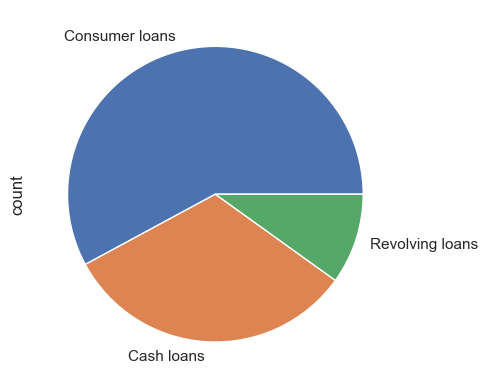

In [208]:
final.NAME_CONTRACT_TYPE_y.value_counts().plot.pie()

In [209]:
final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'REGION_RATING', 'AGE', 'EMPLOYMENT_YR',
       'REGIST_YR', 'ID_PUB_YR', 'AGE_GROUP', 'EMP_EXP_GROUP', 'INCM_GROUP',
       'EXTERNAL_SCORE', 'INT_SCORE', 'PAY_DIFF', 'nTARGET', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_C

# Final Merging

In [210]:


#final.drop('Unnamed: 0', axis=1, inplace=True)

In [211]:
final.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x  GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans    Male            N   
1      100003       0           Cash loans  Female            N   
2      100004       0      Revolving loans    Male            Y   
3      100006       0           Cash loans  Female            N   
4      100007       0           Cash loans    Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2         6750.0           135000.0     Unaccompanied          Working   
3        29686.5           297000.0     Unaccompanied          Working   
4        21865.5           513000.0     Unaccompanied          Working   

  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0    Secondary(Spcl*)  Single / not married  House / apartment   
1    Higher education               Married  House / apartment   
2    Secondary(Spcl*)  Single / not married  House / apartment   
3    Secondary(Spcl*)        Civil marriage  House / apartment   
4    Secondary(Spcl*)  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801          NaN        Laborers              1.0   
1                    0.003541          NaN      Core staff              2.0   
2                    0.010032         26.0        Laborers              1.0   
3                    0.008019          NaN        Laborers              2.0   
4                    0.028663          NaN      Core staff              1.0   

  ORGANIZATION_TYPE  REGION_RATING   AGE  EMPLOYMENT_YR  REGIST_YR  ID_PUB_YR  \
0          Business              4  26.0            2.0       10.0        6.0   
1         Education              2  46.0            4.0        4.0        1.0   
2        Government              4  53.0            1.0       12.0        7.0   
3          Business              4  53.0            9.0       27.0        7.0   
4             Other              4  55.0            9.0       12.0       10.0   

      AGE_GROUP EMP_EXP_GROUP          INCM_GROUP  EXTERNAL_SCORE   INT_SCORE  \
0  Young Adults       1-5 Yrs     MODERATE Class         0.161787  443.047823   
1      Fourties       1-5 Yrs  Lower MIDDLE Class        0.466757  676.669839   
2       Fifties     New Hires         LOWER Class        0.642739  736.313912   
3       Fifties      5-10 Yrs     MODERATE Class         0.650442  726.892863   
4       Fifties      5-10 Yrs     MODERATE Class         0.322738  738.281210   

  PAY_DIFF  nTARGET  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
0  notPaid        0   1038818.0       Consumer loans       9251.775   
1     Paid        1   2396755.0       Consumer loans       6737.310   
2     Paid        1   1564014.0       Consumer loans       5357.250   
3     Paid        1   1697039.0           Cash loans      32696.100   
4     Paid        1   1940724.0           Cash loans      22678.785   

   AMT_APPLICATION  AMT_CREDIT_y  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_y  \
0         179055.0      179055.0               0.0           179055.0   
1          68809.5       68053.5            6885.0            68809.5   
2          24282.0       20106.0            4860.0            24282.0   
3         688500.0      906615.0               NaN           688500.0   
4         202500.0      215865.0               NaN           202500.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAS

##### Categorizing the columns under resp. types

In [212]:
final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'REGION_RATING', 'AGE', 'EMPLOYMENT_YR',
       'REGIST_YR', 'ID_PUB_YR', 'AGE_GROUP', 'EMP_EXP_GROUP', 'INCM_GROUP',
       'EXTERNAL_SCORE', 'INT_SCORE', 'PAY_DIFF', 'nTARGET', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_C

In [213]:
total_fam =['CNT_CHILDREN','CNT_FAM_MEMBERS']
amount = ['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x']
years = ['OWN_CAR_AGE','AGE','EMPLOYMENT_YR','REGIST_YR','ID_PUB_YR']
info = ['AGE_GROUP','GENDER','NAME_FAMILY_STATUS','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_HOUSING_TYPE']
groups = ['EMP_EXP_GROUP','INCM_GROUP','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
liabilities = ['CNT_CHILDREN','CNT_FAM_MEMBERS','FLAG_OWN_CAR']

In [214]:
new_amount = ['AMT_ANNUITY_y', 'AMT_APPLICATION','AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y']

## 2. Univariate Analysis 


### 2.1 Analysis on years based categories

<Axes: >

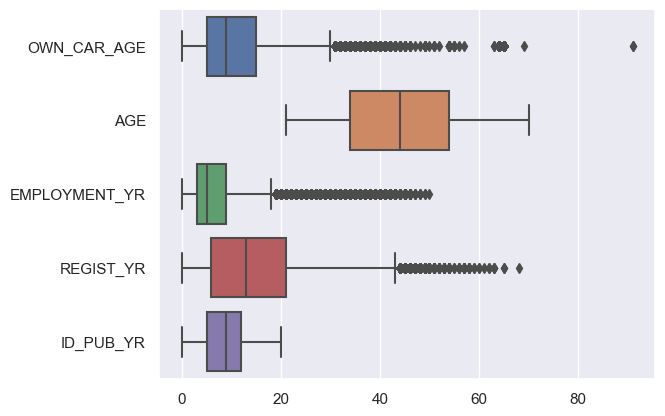

In [215]:

sns.boxplot(final[years],orient='h')

##### The outlier here was already addressed in Sanity check in prev noteBook.

### 2.2 Analysis on Family Memebers & Children

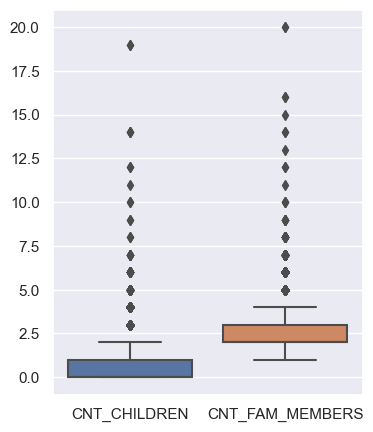

In [216]:
fig = plt.figure(figsize=[4,5])


sns.boxplot(final[['CNT_CHILDREN','CNT_FAM_MEMBERS']], orient='v')

plt.show()

#### Possibility is the childers could be adapted(ex. Orphange house)

### 2.3  Categorical UnOrdered (Univariate Analysis)

### 2.3 Bivariate Analysis  on  Unnordered wrt Applicants

AGE_GROUP
Thirties           82331
Fourties           76599
Fifties            68094
Young Adults       45186
Senior Citizens    35301
Name: count, dtype: int64
Looks like ('Thirties',) as more with 26.77% trend


GENDER
Female    202452
Male      105059
Name: count, dtype: int64
Looks like ('Female',) as more with 65.84% trend


NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64
Looks like ('Married',) as more with 63.88% trend


FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
Looks like ('N',) as more with 65.99% trend


FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
Looks like ('Y',) as more with 69.37% trend


NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          11

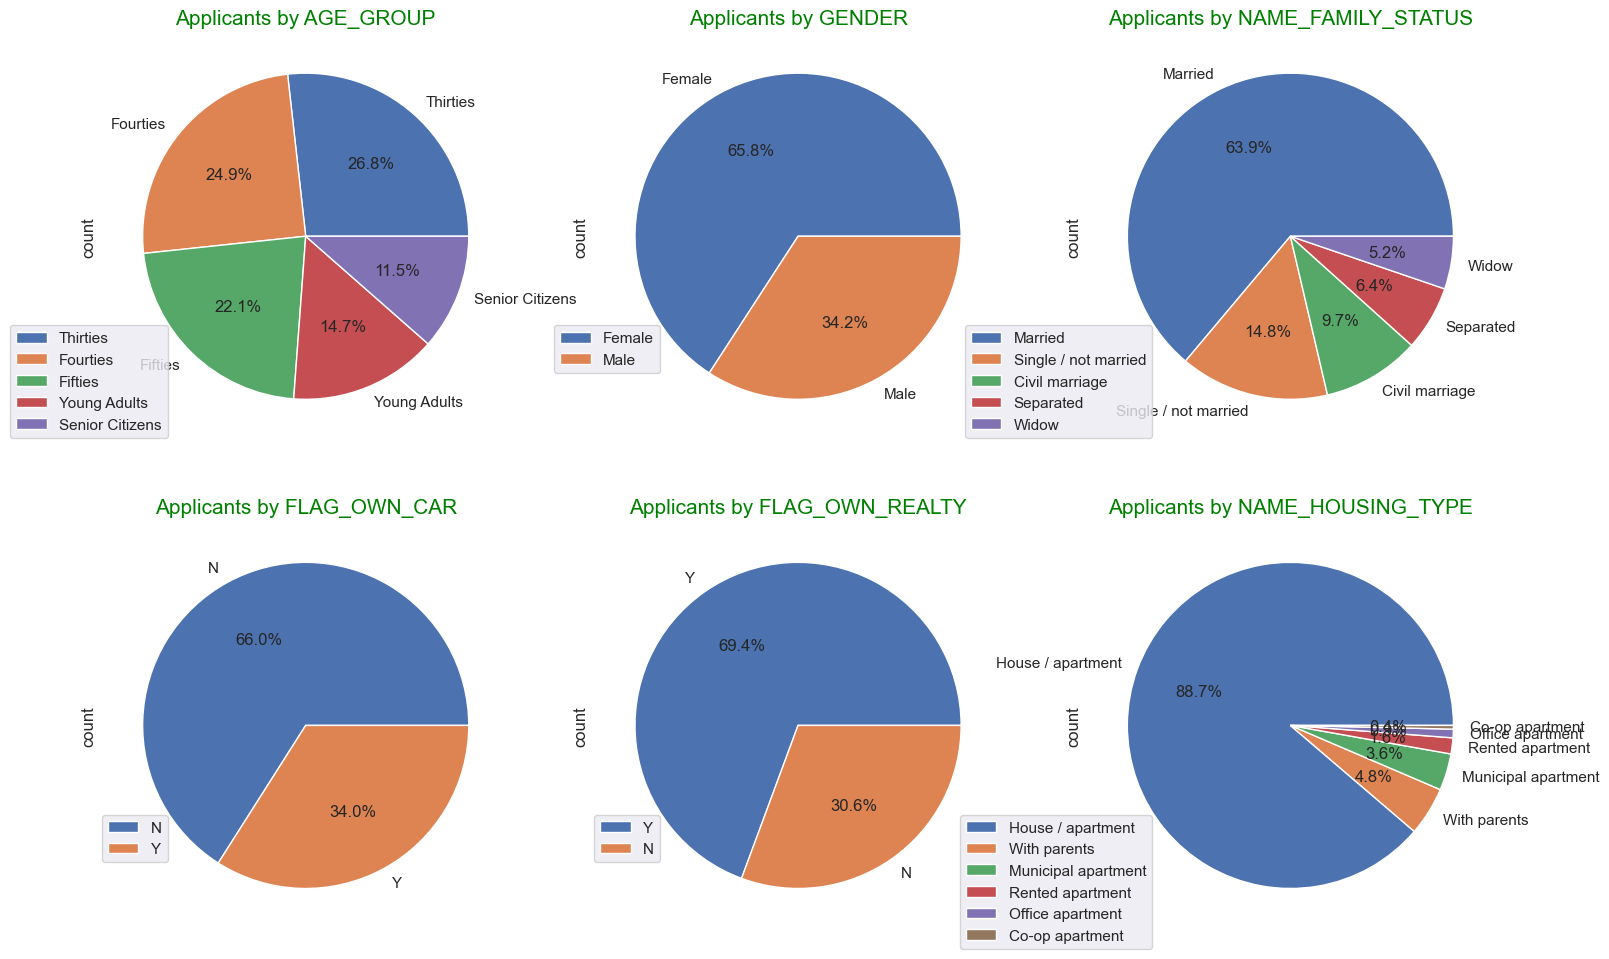

In [217]:
for i in info:
    
    data = final[[i]].value_counts(normalize=True)
  
#normalize=True)*100
    print(final[i].value_counts())
    
    print('Looks like '+ str(data.index[0]) +' as more with '+ str(np.round(data[0]*100,2))+'%'+' trend')
    print('\n')
    

fig = plt.figure(figsize=[18,18])
j=1
for i in info:
    plt.subplot(3,3,j)
    final[i].value_counts().plot.pie(autopct='%1.1f%%')
    
    title = "Applicants by "+i
    plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    
    
    plt.legend()
    plt.legend(bbox_to_anchor=(0.18,0.3))

    j+=1
    
    
plt.show()


### 2.4 Bivariate Analysis  on  Unnordered wrt defaulters

AGE_GROUP
Thirties           82331
Fourties           76599
Fifties            68094
Young Adults       45186
Senior Citizens    35301
Name: count, dtype: int64
Looks like ('Thirties',) as more with 26.77% trend


GENDER
Female    202452
Male      105059
Name: count, dtype: int64
Looks like ('Female',) as more with 65.84% trend


NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64
Looks like ('Married',) as more with 63.88% trend


FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
Looks like ('N',) as more with 65.99% trend


FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
Looks like ('Y',) as more with 69.37% trend


NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          11

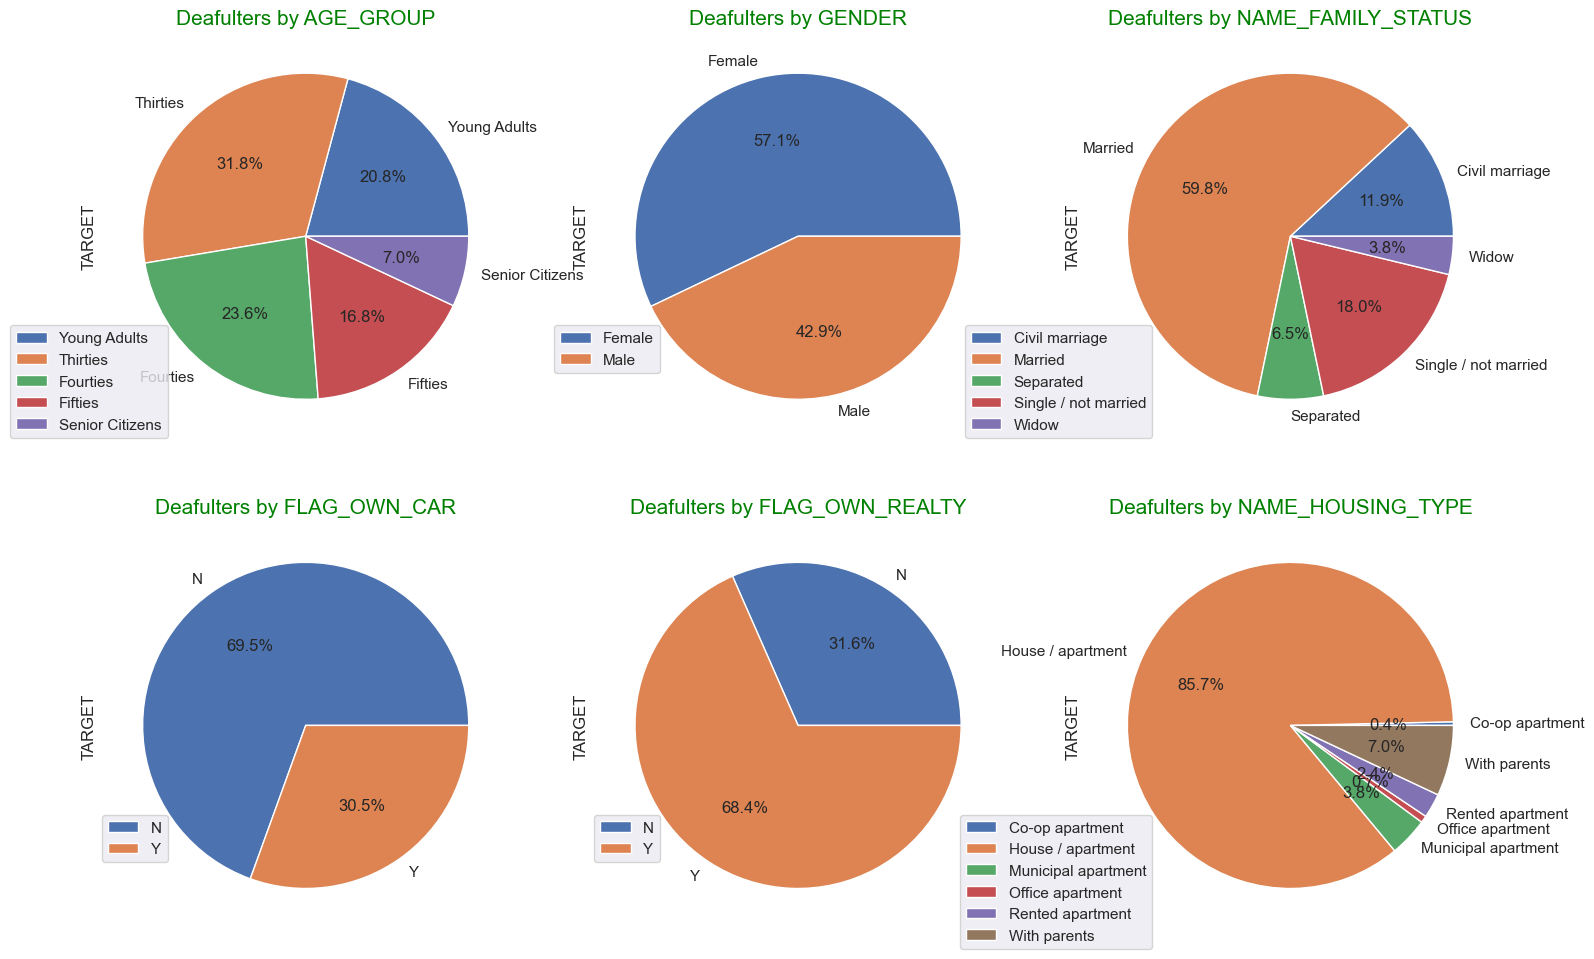

In [218]:
for i in info:
    
    data = final[[i]].value_counts(normalize=True)
  
#normalize=True)*100
    print(final[i].value_counts())
    
    print('Looks like '+ str(data.index[0]) +' as more with '+ str(np.round(data[0]*100,2))+'%'+' trend')
    print('\n')
    

fig = plt.figure(figsize=[18,18])
j=1
for i in info:
    plt.subplot(3,3,j)
    final.groupby(i)['TARGET'].sum().plot.pie(autopct='%1.1f%%')
    
    title = "Deafulters by "+i
    plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    
    
    plt.legend()
    plt.legend(bbox_to_anchor=(0.18,0.3))

    j+=1
    
    
plt.show()


### 2.5  Categorical Unordered (Univariate Analysis)

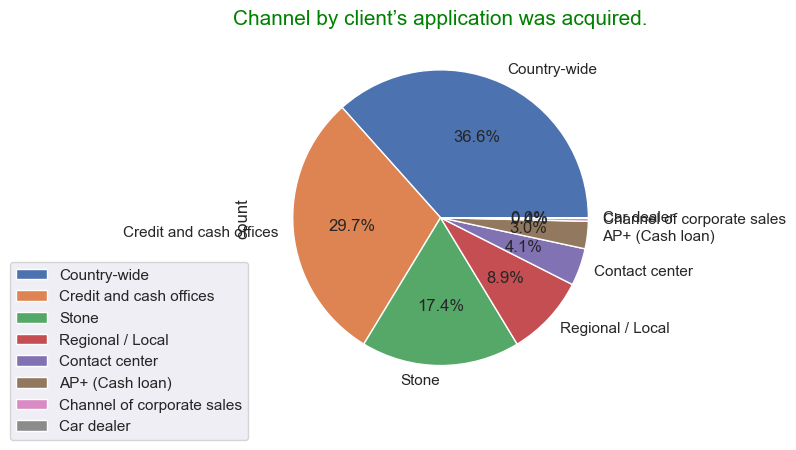

In [219]:
final.CHANNEL_TYPE.value_counts().plot.pie(autopct='%1.1f%%')
title = 'Channel by client’s application was acquired.'
    
plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(0,0.4))

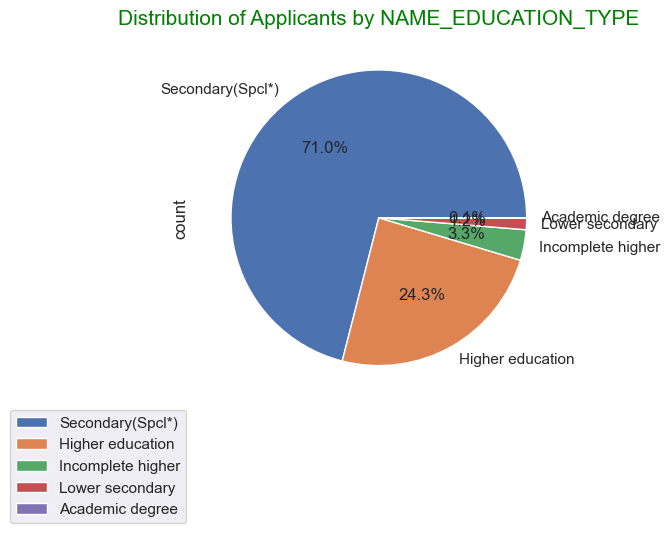

In [220]:
title = "Distribution of Applicants by NAME_EDUCATION_TYPE"

plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
final.NAME_EDUCATION_TYPE.value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.legend(bbox_to_anchor=(0,0))
plt.show()

### 2.6  Categorical Ordered (Univariate Analysis)


In [221]:
groups

['EMP_EXP_GROUP',
 'INCM_GROUP',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE']

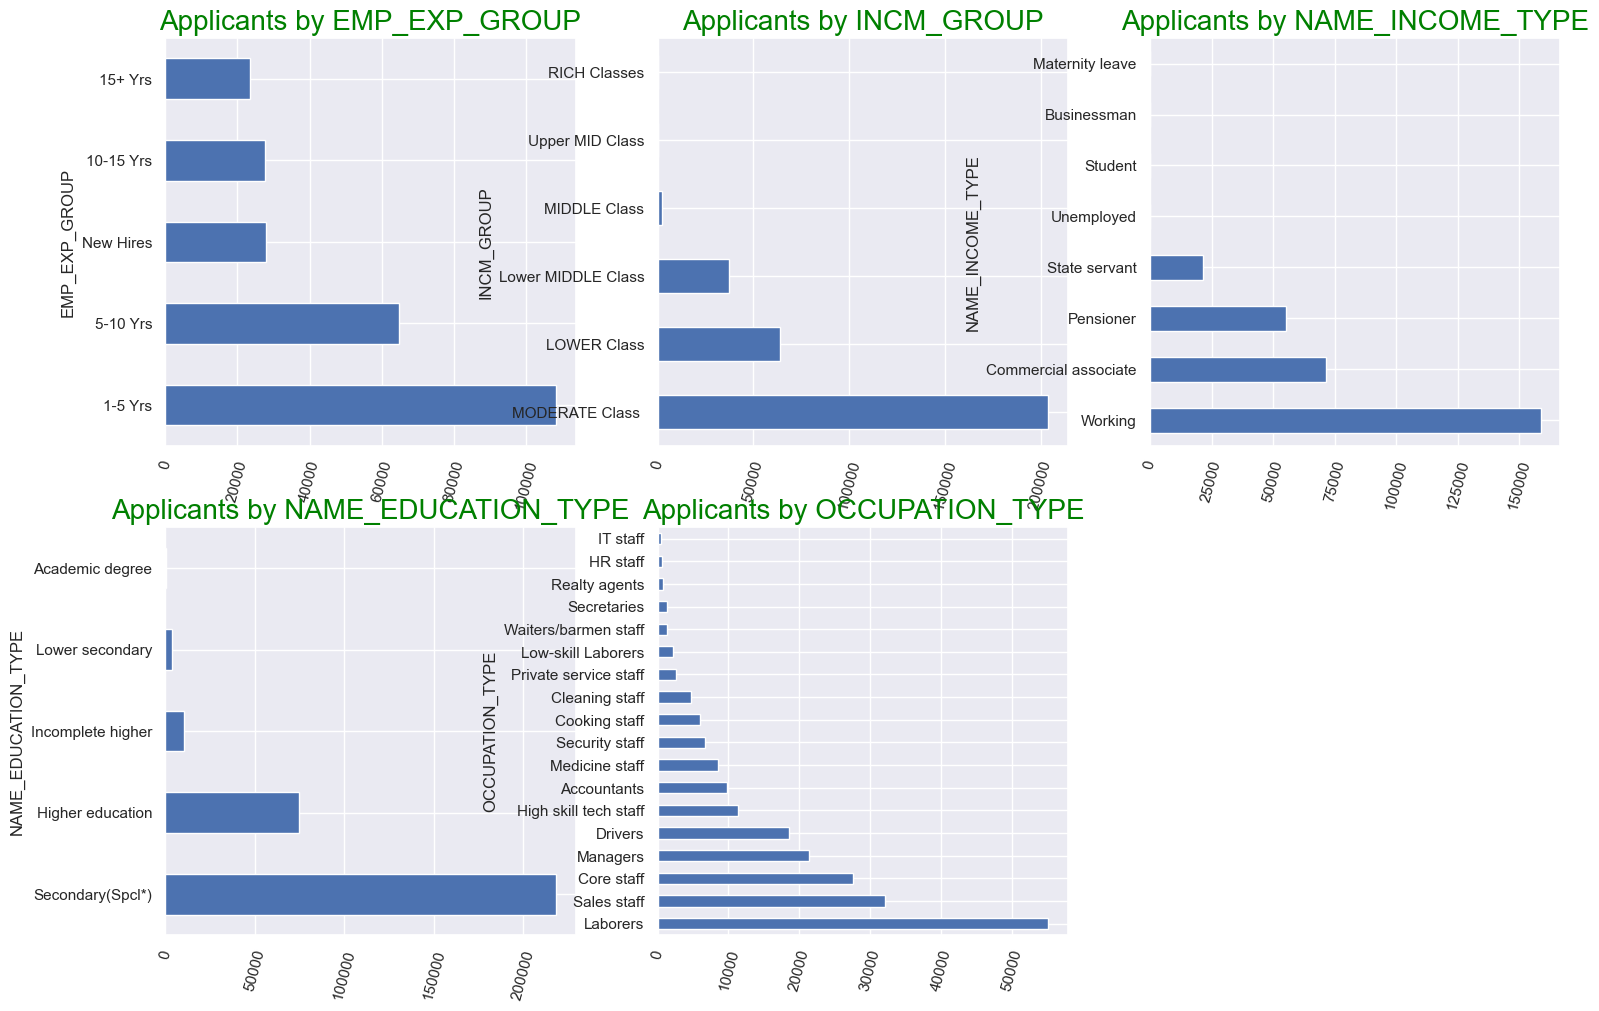

In [222]:
fig = plt.figure(figsize=[18,18])
j=1
for i in groups:
    
    plt.subplot(3,3,j)
    
    title = "Applicants by "+ i
  

    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

    final[i].value_counts().plot.barh()
    
    
    plt.xticks(rotation=75)
    j+=1
    
plt.show()

### Single Attribute

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1-5 Yrs'),
  Text(1, 0, '5-10 Yrs'),
  Text(2, 0, 'New Hires'),
  Text(3, 0, '10-15 Yrs'),
  Text(4, 0, '15+ Yrs')])

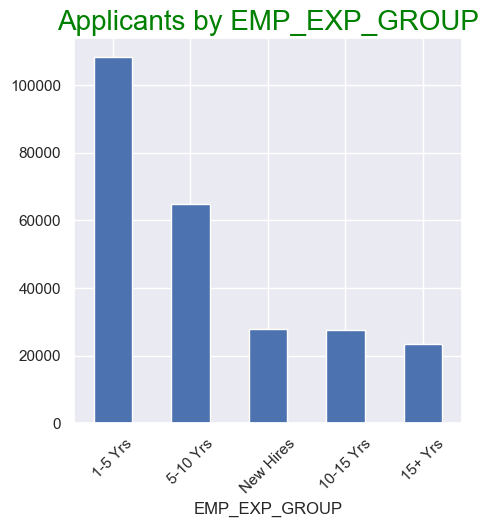

In [223]:
fig = plt.figure(figsize=[5,5])
    
title = "Applicants by EMP_EXP_GROUP"


plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

final['EMP_EXP_GROUP'].value_counts().plot.bar()


plt.xticks(rotation=45)


## 3. Bivariate Analysis w.r.t TARGET(defaulters)


### 3.1 Distribution of Type of loan for both defaulters & non Defaulters

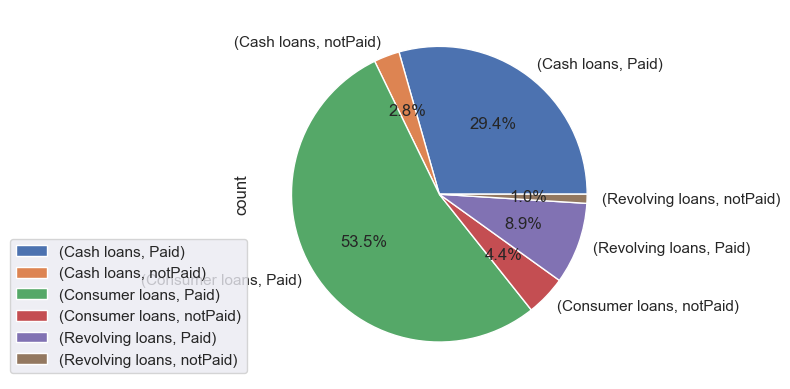

In [224]:
final.groupby('NAME_CONTRACT_TYPE_y')['PAY_DIFF'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.legend(bbox_to_anchor=(0,0.4))

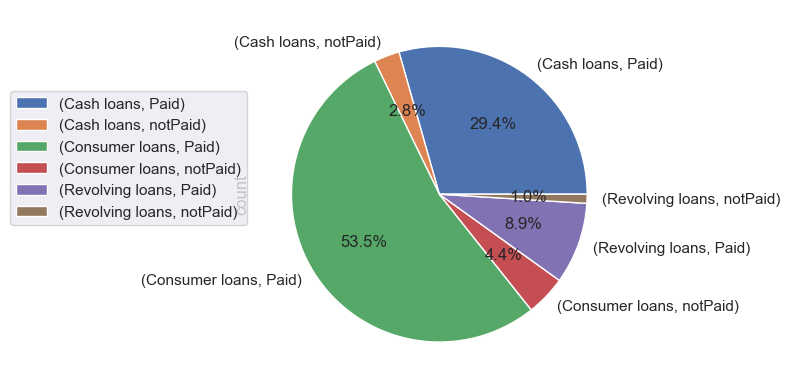

In [225]:
final.groupby('NAME_CONTRACT_TYPE_y')['PAY_DIFF'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.legend(bbox_to_anchor=(0,0.8))

### 3.2 Bivariate Analysis  on  Unnordered

In [226]:
info

['AGE_GROUP',
 'GENDER',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE']

In [227]:
tempgrp = ['EMP_EXP_GROUP', 'INCM_GROUP',]

In [228]:
groups

['EMP_EXP_GROUP',
 'INCM_GROUP',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE']

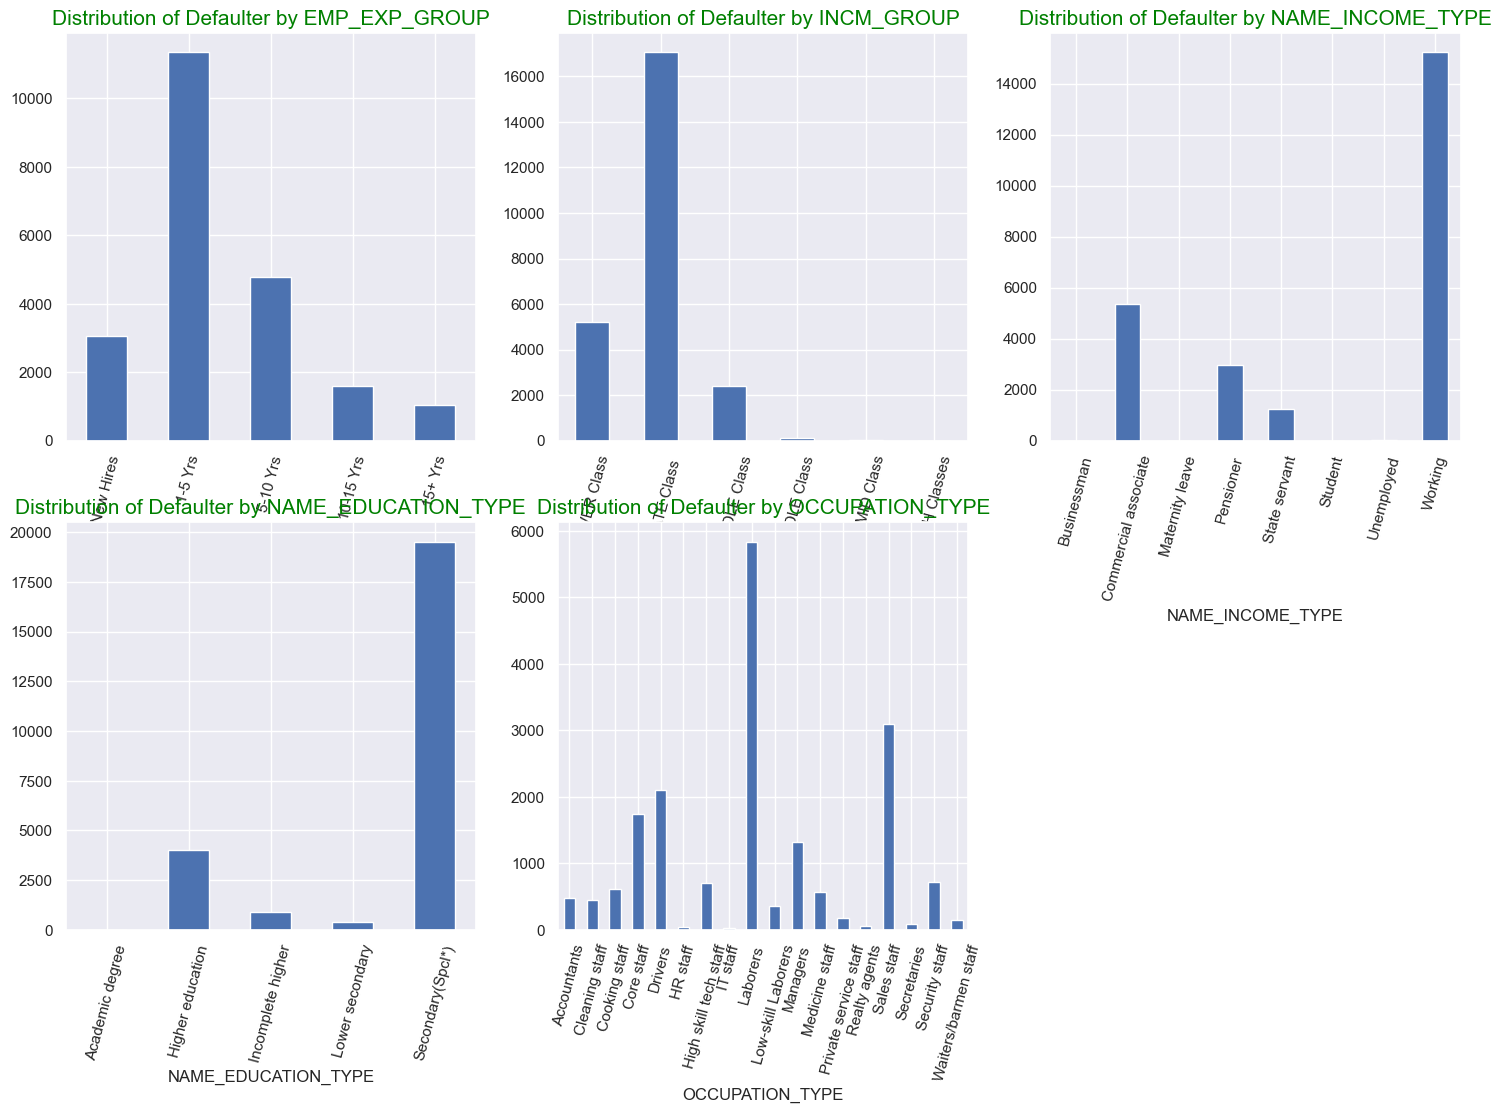

In [229]:
fig = plt.figure(figsize=[18,18])
j=1
for i in groups:
    plt.subplot(3,3,j)
 
    final.groupby(i)['TARGET'].sum().plot.bar()
    title = "Distribution of Defaulter by "+i
    
    plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
    
    plt.xticks(rotation=75)
    
    j+=1
    
plt.show()

### Applicants wrt age & Income type

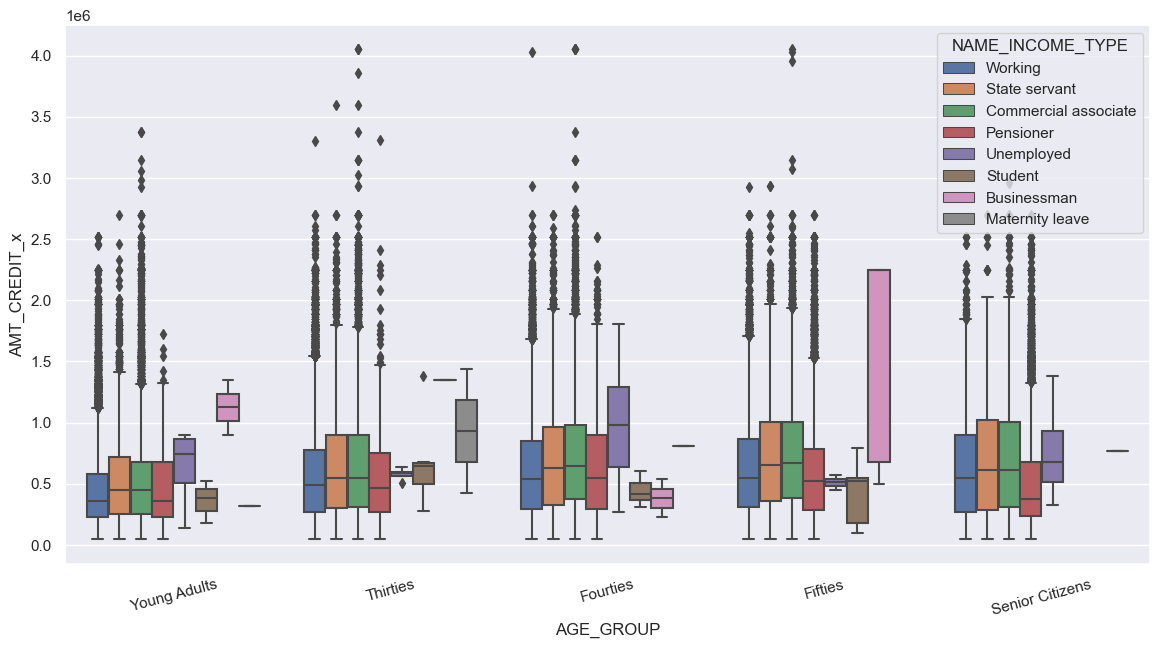

In [230]:
fig = plt.figure(figsize=[14,7])
sns.boxplot( x=final['AGE_GROUP'],y=final['AMT_CREDIT_x'],hue=final.NAME_INCOME_TYPE, orient='v')
plt.xticks(rotation=15)
plt.show()


## 4. MULTIVARIATE Analysis w.r.t TARGET

In [231]:
final.AMT_CREDIT_x.max()

4050000.0

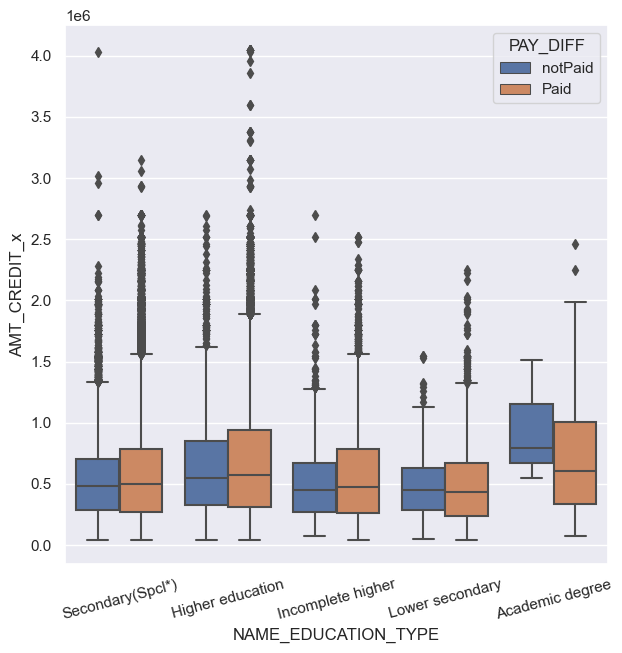

In [232]:
fig = plt.figure(figsize=[7,7])
sns.boxplot(data=final,  x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_x',hue=final.PAY_DIFF, orient='v')
plt.xticks(rotation=15)
plt.show()


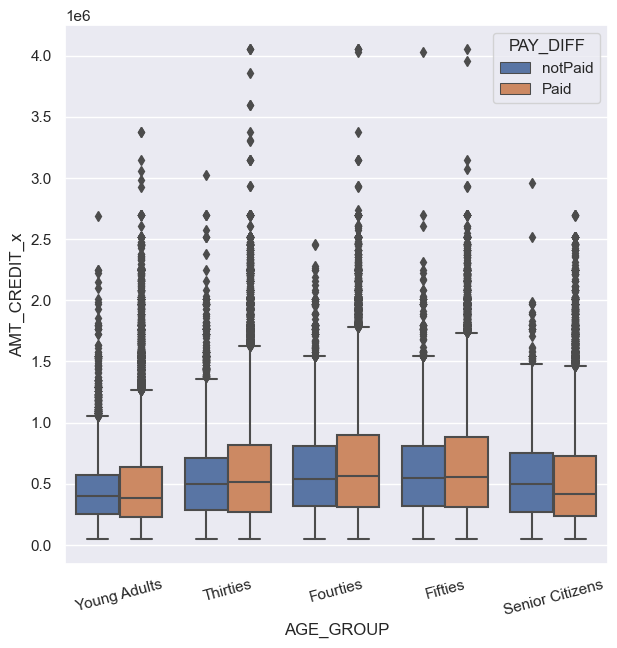

In [233]:
fig = plt.figure(figsize=[7,7])

sns.boxplot( x=final['AGE_GROUP'],y=final['AMT_CREDIT_x'],hue=final.PAY_DIFF, orient='v')
plt.xticks(rotation=15)
plt.show()


 ### AMT_CREDIT_y for payers/Defaulter claasified info NAME_FAMILY_STATUS, capped 

In [234]:
cap_credit =final[final.AMT_CREDIT_y<400000]

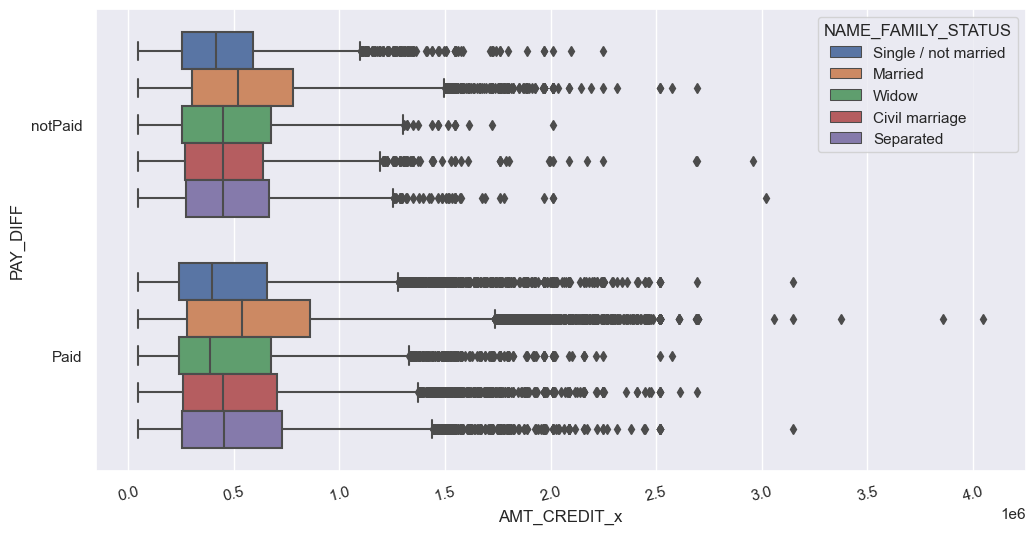

In [235]:
fig = plt.figure(figsize=[12,6])
sns.boxplot(data=cap_credit, x='AMT_CREDIT_x',y='PAY_DIFF', hue='NAME_FAMILY_STATUS')
plt.xticks(rotation=15)
plt.show()

 ### AMT_CREDIT_y for payers/Defaulter claasified into  AGE_GROUP


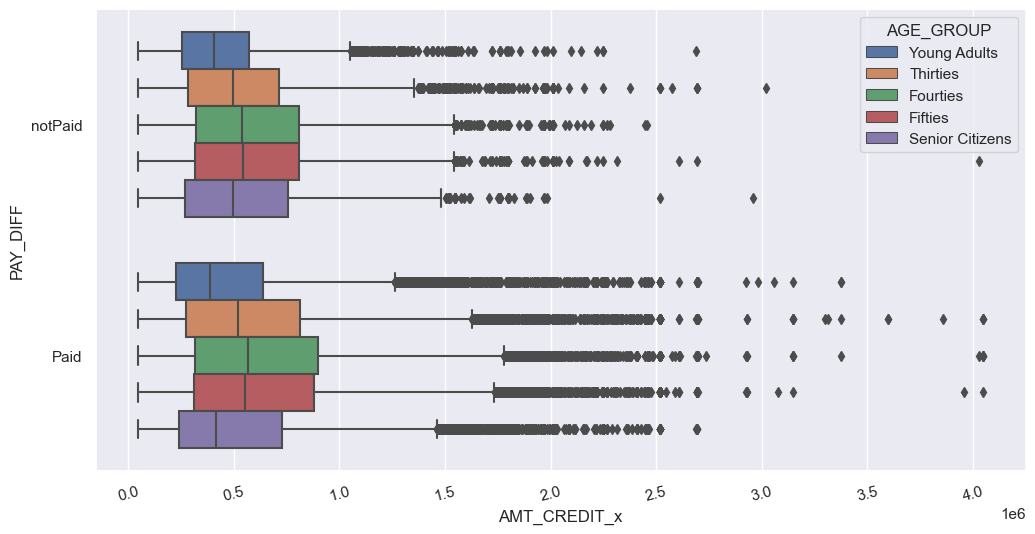

In [236]:
fig = plt.figure(figsize=[12,6])
sns.boxplot(data=final, x='AMT_CREDIT_x',y='PAY_DIFF', hue='AGE_GROUP')
plt.xticks(rotation=15)
plt.show()

 ### AMT_CREDIT_y for payers/Defaulter claasified into income group

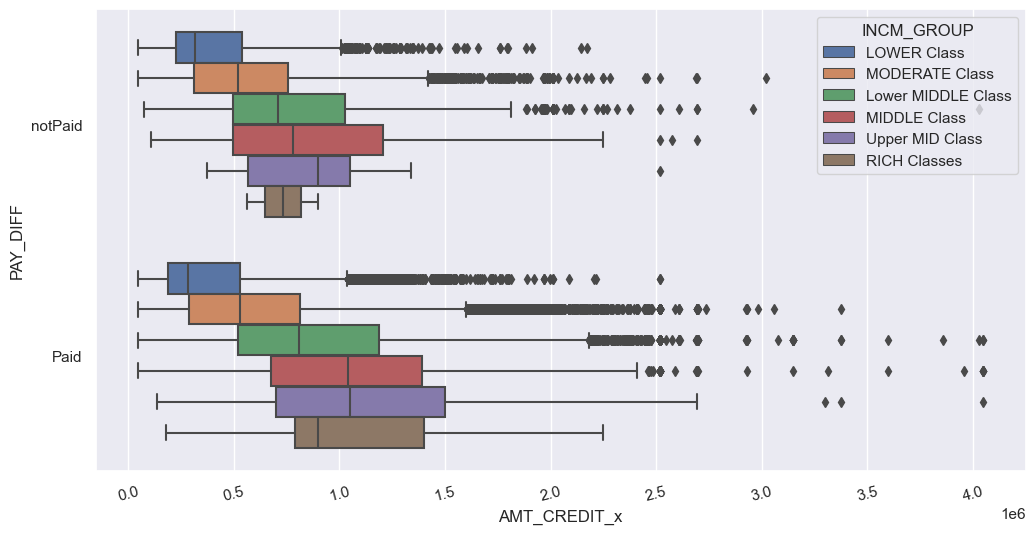

In [237]:
fig = plt.figure(figsize=[12,6])
sns.boxplot(data=final, x='AMT_CREDIT_x',y='PAY_DIFF', hue='INCM_GROUP')
plt.xticks(rotation=15)
plt.show()

## 5.  Analysis on Numerics

### Numerics wrt the Income_Tupe

<Figure size 1200x700 with 0 Axes>

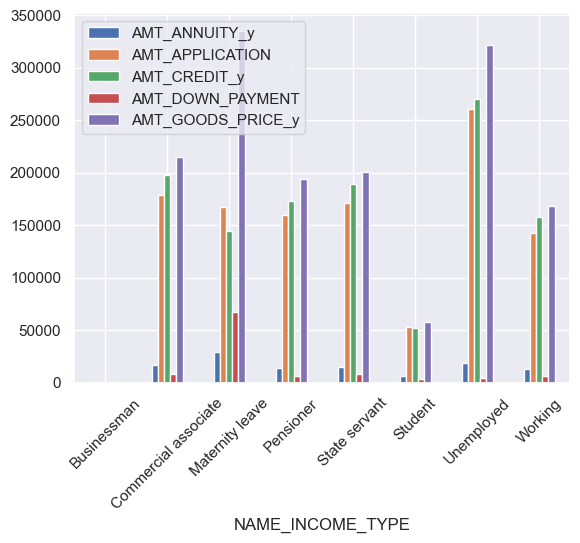

In [238]:
fig = plt.figure(figsize=[12,7])
final.groupby('NAME_INCOME_TYPE')[new_amount].aggregate('mean').plot.bar()
plt.xticks(rotation=45)
plt.show()

### LOAN vs SALARY wrt to TARGETS excl. Rich Classes(capping)

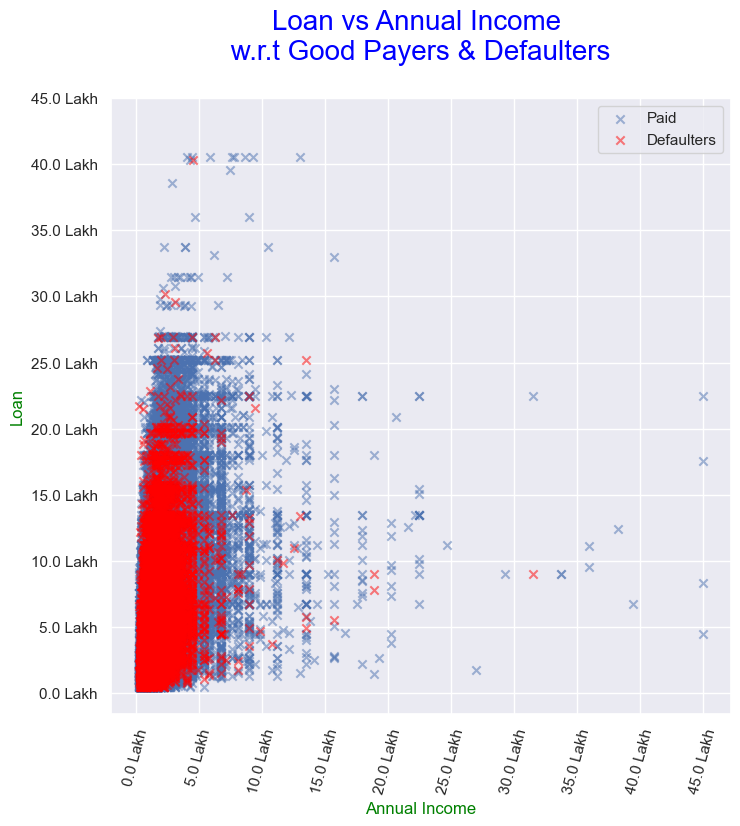

In [239]:
fig = plt.figure(figsize=[8,8])
plt.scatter(data= final[(final.AMT_INCOME_TOTAL<5000000) & (final.TARGET == 0)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='x', alpha=0.5,label='Paid')
plt.scatter(data= final[(final.AMT_INCOME_TOTAL<5000000) & (final.TARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='x', alpha=0.5, c='red',label= 'Defaulters')



plt.title("Loan vs Annual Income \n w.r.t Good Payers & Defaulters \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

plt.xlabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.xticks(ticks,labels,rotation=75)

plt.ylabel("Loan", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.yticks(ticks,labels)

plt.legend()
plt.show()

### LOAN vs SALARY + paid/nonPaid + Male/Female (excl. Rich Classes)

In [240]:
nonRich = final[final.AMT_INCOME_TOTAL<5000000]

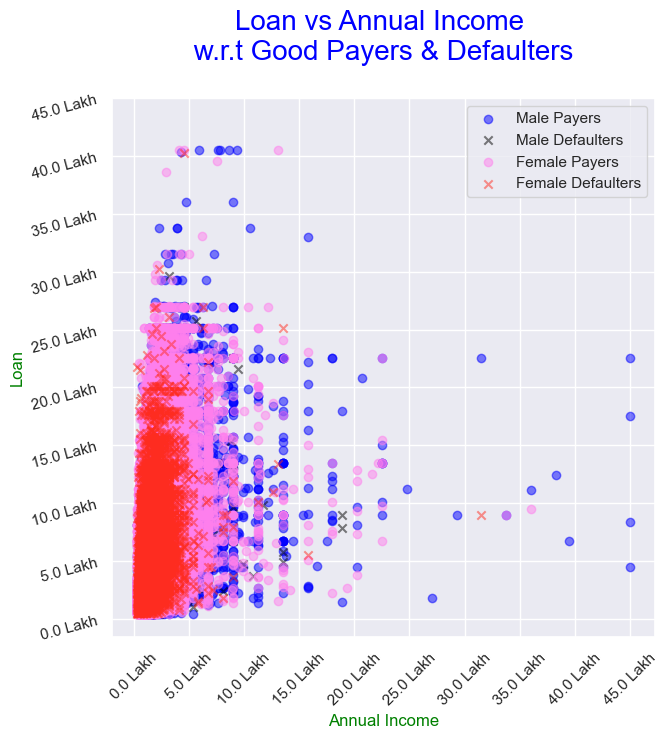

In [241]:
fig = plt.figure(figsize=[7,7])
plt.scatter(data= nonRich[(nonRich.GENDER == 'Male') & (final.TARGET == 0)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='blue',label= 'Male Payers')
plt.scatter(data= nonRich[(nonRich.GENDER == 'Male') & (final.TARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='x', alpha=0.5, c='black',label= 'Male Defaulters')
plt.scatter(data= nonRich[(nonRich.GENDER == 'Female') & (final.TARGET == 0)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='#ff80ed',label= 'Female Payers')
plt.scatter(data= nonRich[(nonRich.GENDER == 'Female') & (final.TARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='x', alpha=0.5, c='#ff2c20',label= 'Female Defaulters')



plt.title("Loan vs Annual Income \n w.r.t Good Payers & Defaulters \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

plt.xlabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.xticks(ticks,labels,rotation=45)

plt.ylabel("Loan", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.yticks(ticks,labels,rotation=15)

plt.legend()
plt.show()

### Pair plots showing relation btween the numerics

In [242]:
amount

['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']

### HPC required, unlock # please...

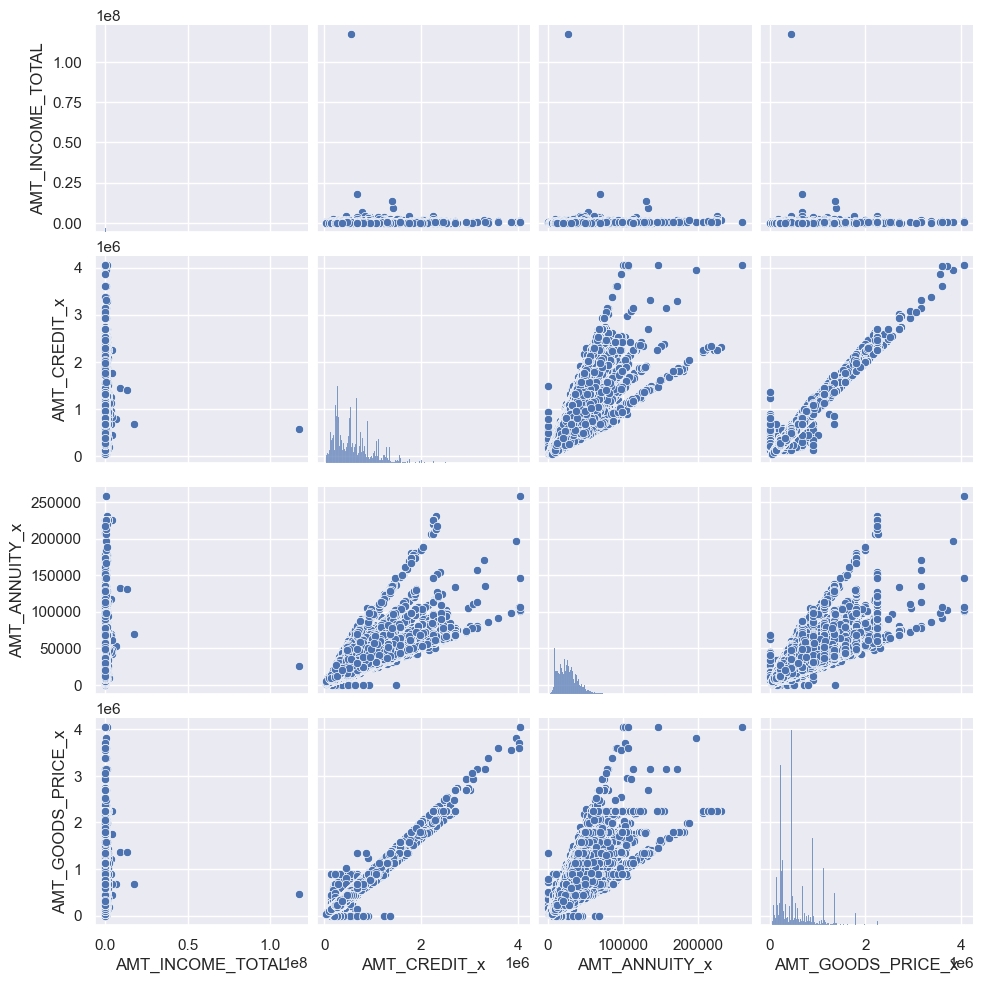

In [243]:

sns.pairplot(final[amount])

In [244]:
new_amount

['AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE_y']

### HPC required, unlock # please...

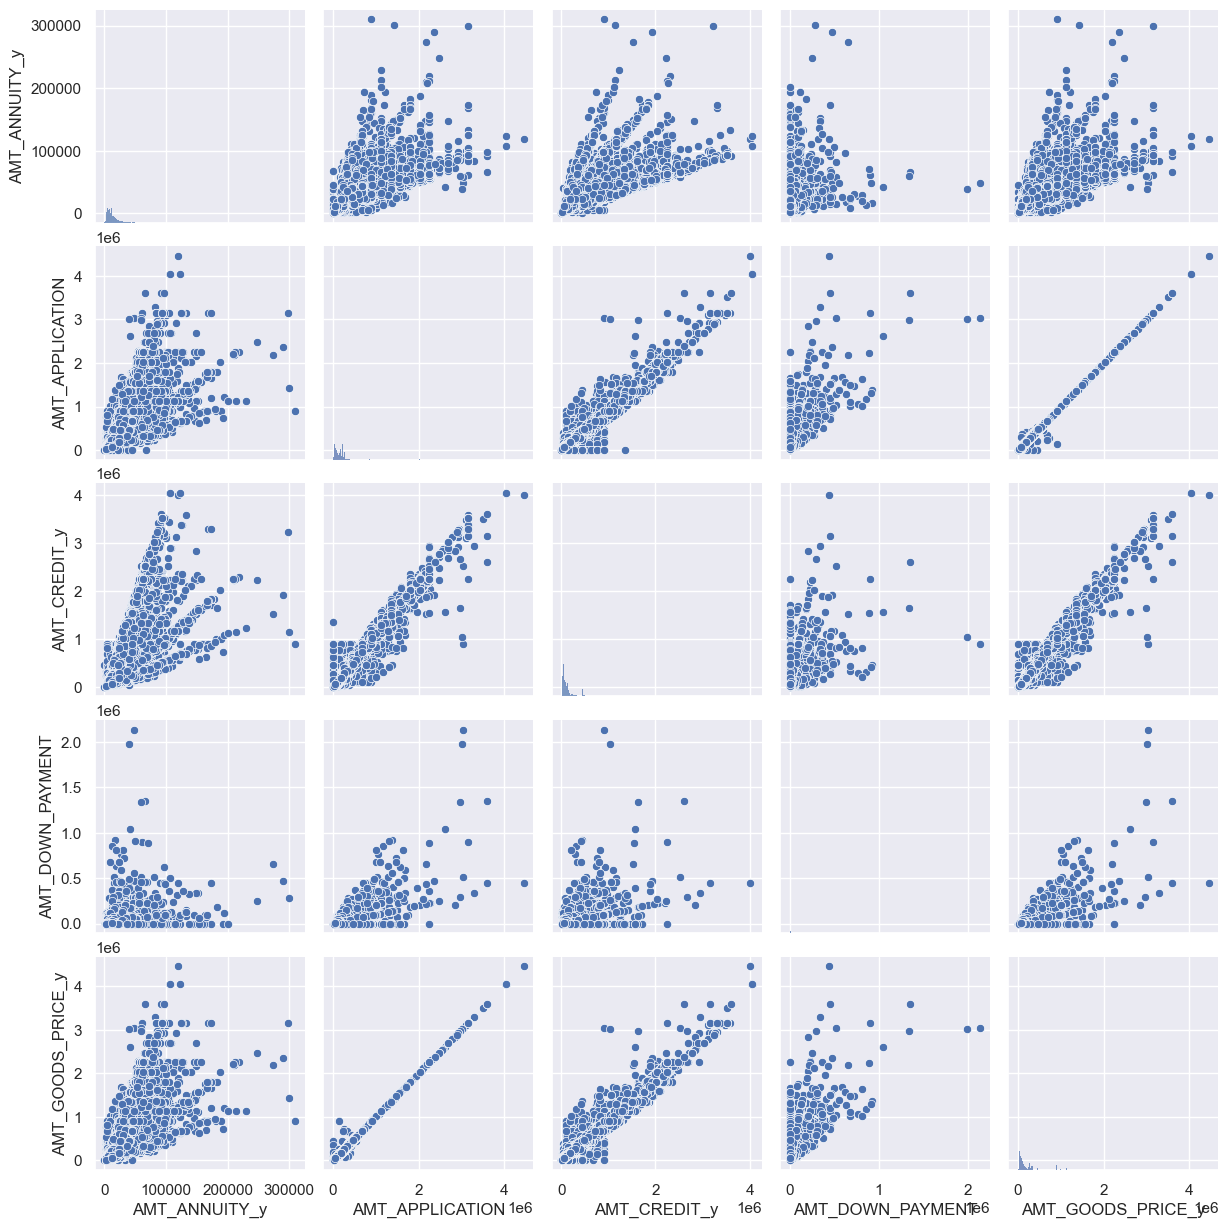

In [245]:

sns.pairplot(final[new_amount])

## Analysis on 2nd Targate variable -NAME_CONTRACT_STATUS [Previous_Application]

### Univariate analysis

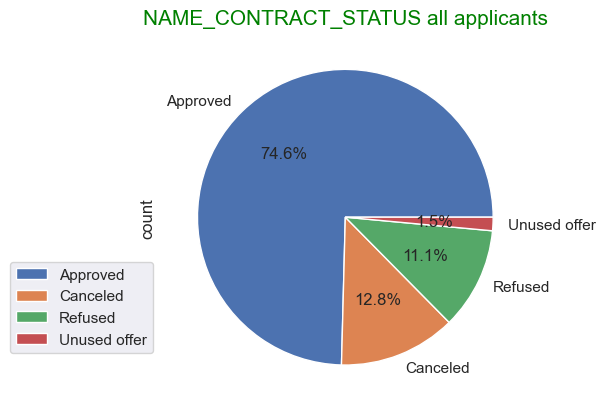

In [246]:
final.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct='%1.1f%%')
title = 'NAME_CONTRACT_STATUS all applicants'
    
plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(0,0.4))

In [247]:
final.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        217090
Canceled         37284
Refused          32411
Unused offer      4272
Name: count, dtype: int64

### "NAME_CONTRACT_STATUS by groups"

### Bivariate analysis   [Previous_Application]

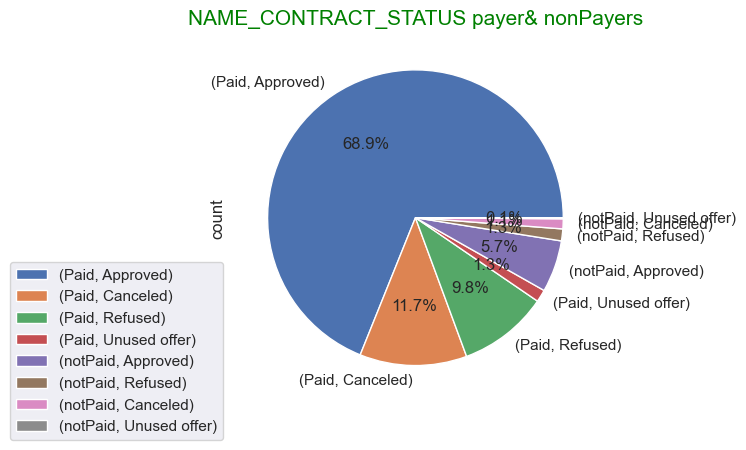

In [248]:
final.groupby('PAY_DIFF').NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct='%1.1f%%')
title = 'NAME_CONTRACT_STATUS payer& nonPayers'
    
plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(0,0.4))

### MULTIVARIATE Analysis on Final Document(merged file)

In [249]:
groups

['EMP_EXP_GROUP',
 'INCM_GROUP',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE']

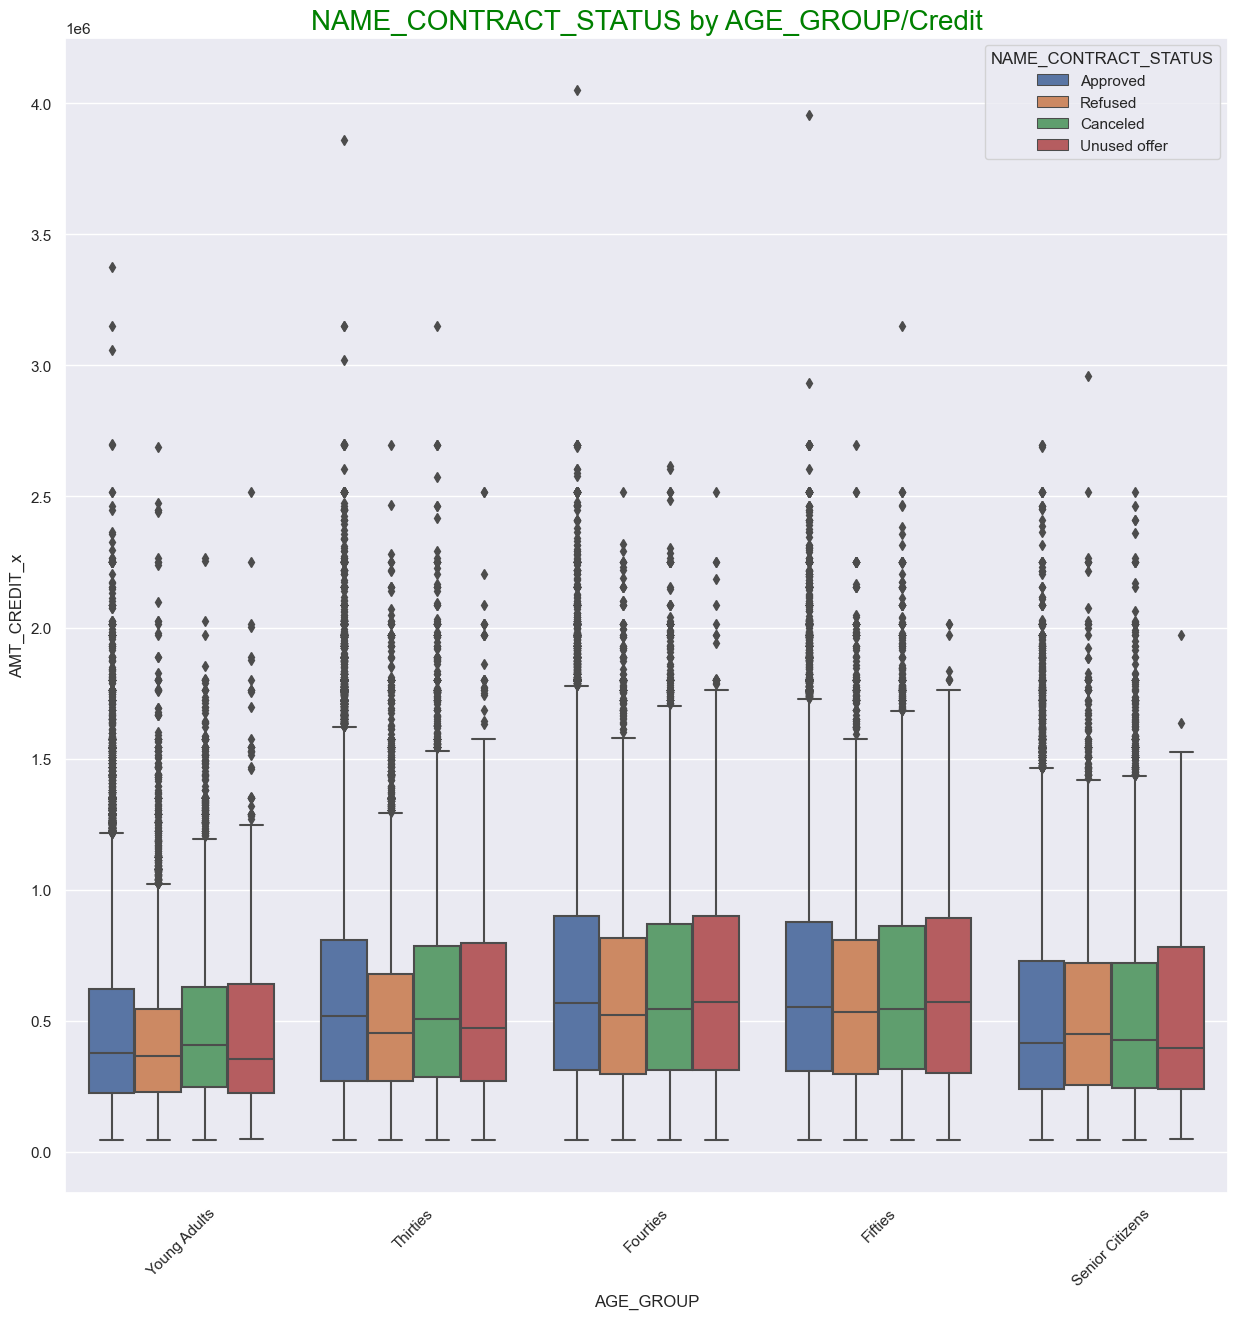

In [250]:
fig = plt.figure(figsize=[15,15])
    
title = "NAME_CONTRACT_STATUS by AGE_GROUP/Credit"



sns.boxplot( x=final['AGE_GROUP'],y=final['AMT_CREDIT_x'],hue=final.NAME_CONTRACT_STATUS, orient='v')
plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation=45)
plt.show()

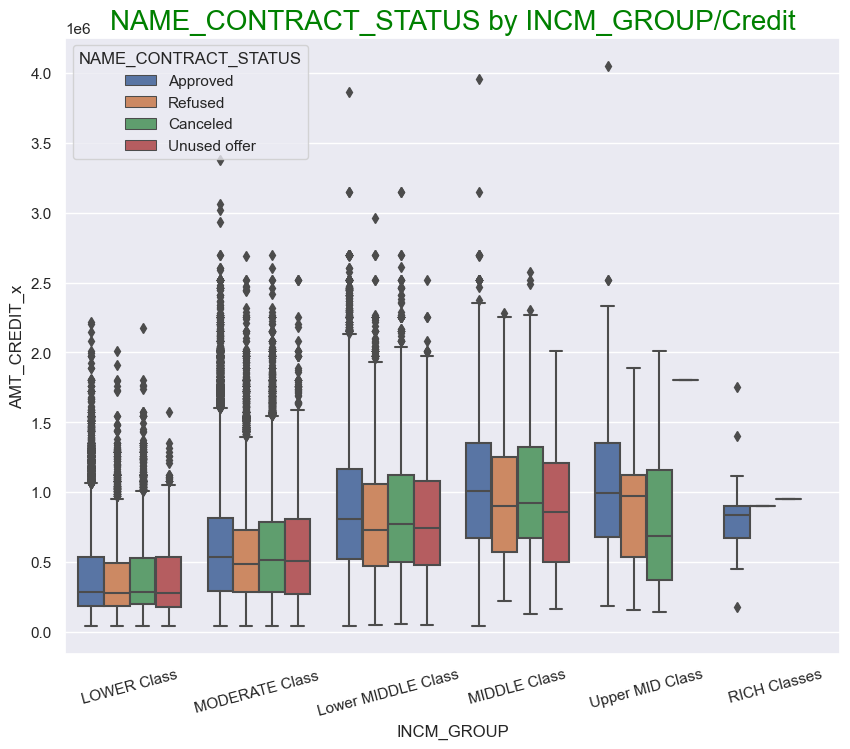

In [251]:
fig = plt.figure(figsize=[10,8])
    
title = "NAME_CONTRACT_STATUS by INCM_GROUP/Credit"



sns.boxplot( x=final['INCM_GROUP'],y=final['AMT_CREDIT_x'],hue=final.NAME_CONTRACT_STATUS, orient='v')
plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation=15)
plt.show()

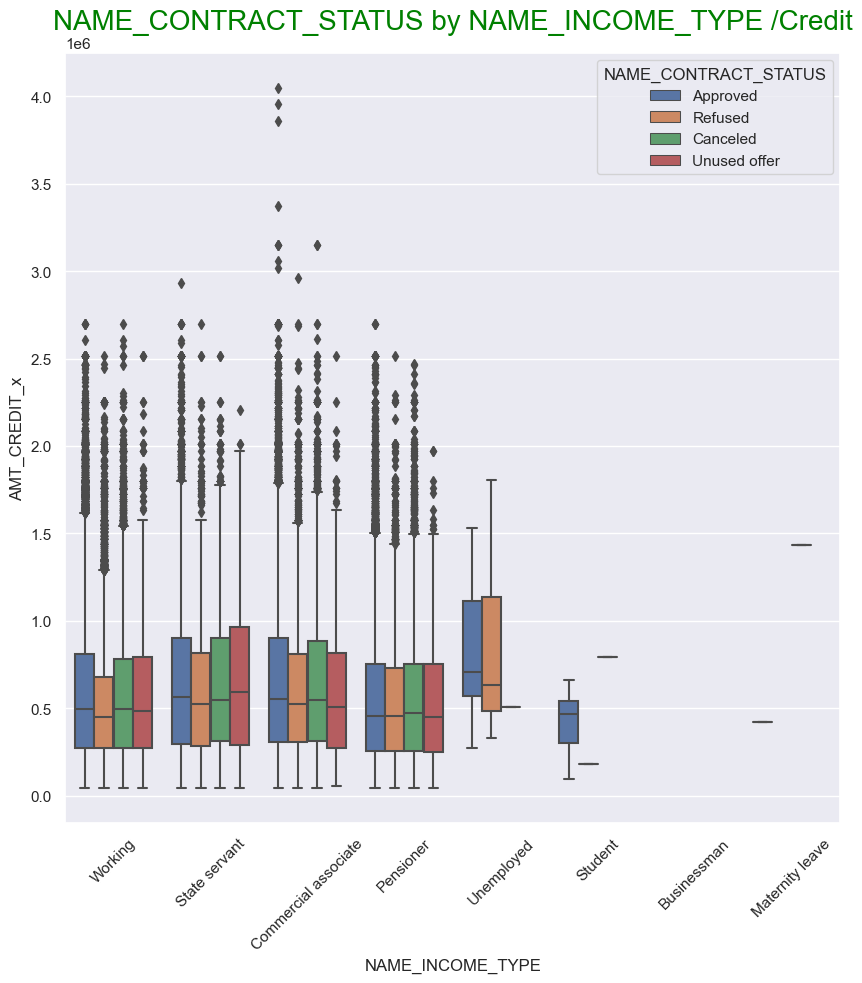

In [252]:
fig = plt.figure(figsize=[10,10])
    
title = "NAME_CONTRACT_STATUS by NAME_INCOME_TYPE /Credit"



sns.boxplot( x=final['NAME_INCOME_TYPE'],y=final['AMT_CREDIT_x'],hue=final.NAME_CONTRACT_STATUS, orient='v')
plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation=45)
plt.show()

#### 

### MULTIVARIATE Analysis w.r.t 2nd TARGET  NAME_CONTRACT_STATUS

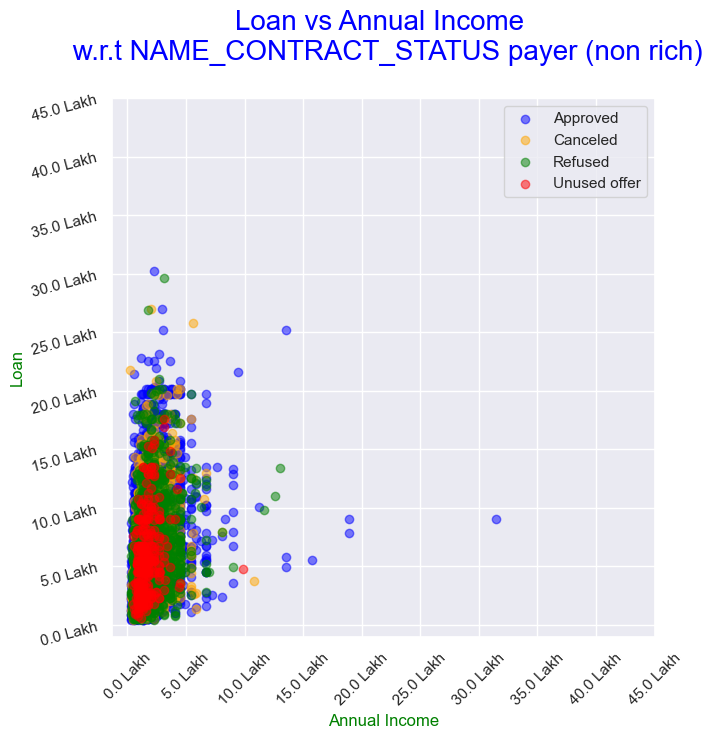

In [253]:
fig = plt.figure(figsize=[7,7])
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Approved') & (final.TARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='blue',label= 'Approved')
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Canceled') & (final.TARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='orange',label= 'Canceled')
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Refused') & (final.TARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='green',label= 'Refused')
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Unused offer') & (final.TARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='red',label= 'Unused offer')



plt.title("Loan vs Annual Income \n w.r.t NAME_CONTRACT_STATUS payer (non rich)\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

plt.xlabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.xticks(ticks,labels,rotation=45)

plt.ylabel("Loan", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.yticks(ticks,labels,rotation=15)

plt.legend()
plt.show()

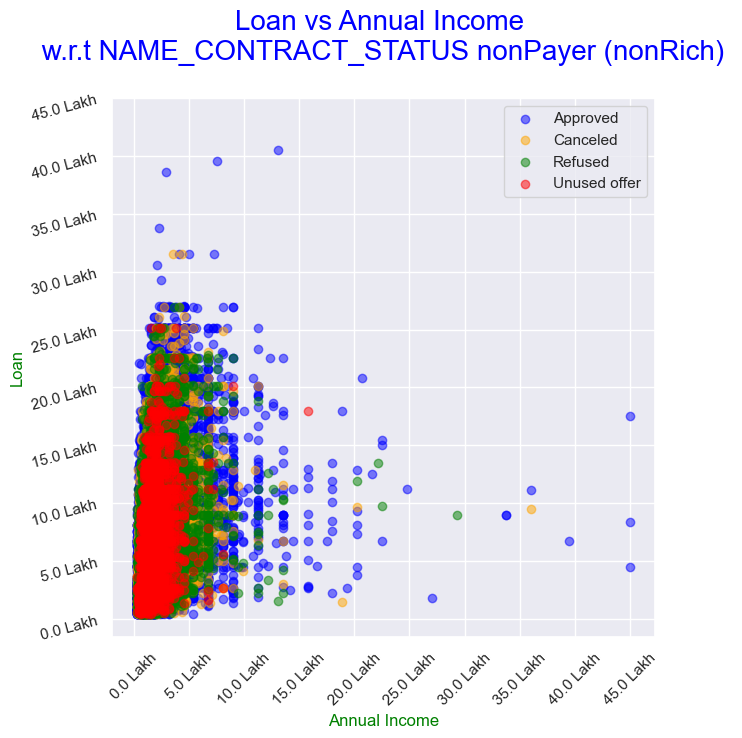

In [254]:
fig = plt.figure(figsize=[7,7])
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Approved') & (final.nTARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='blue',label= 'Approved')
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Canceled') & (final.nTARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='orange',label= 'Canceled')
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Refused') & (final.nTARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='green',label= 'Refused')
plt.scatter(data= nonRich[(nonRich.NAME_CONTRACT_STATUS == 'Unused offer') & (final.nTARGET == 1)], x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x',marker='o', alpha=0.5, c='red',label= 'Unused offer')



plt.title("Loan vs Annual Income \n w.r.t NAME_CONTRACT_STATUS nonPayer (nonRich) \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

plt.xlabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.xticks(ticks,labels,rotation=45)

plt.ylabel("Loan", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Green'})
ticks = np.arange(0,5000000,500000)
labels = ["{} Lakh".format(i/100000) for i in ticks]
plt.yticks(ticks,labels,rotation=15)

plt.legend()
plt.show()

### 6. CORRS heatMaps! 

In [255]:
final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'REGION_RATING', 'AGE', 'EMPLOYMENT_YR',
       'REGIST_YR', 'ID_PUB_YR', 'AGE_GROUP', 'EMP_EXP_GROUP', 'INCM_GROUP',
       'EXTERNAL_SCORE', 'INT_SCORE', 'PAY_DIFF', 'nTARGET', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_C

### 6.1 Corelation wrt AGE_GROUP &  INCM_GROUP for non Targets 

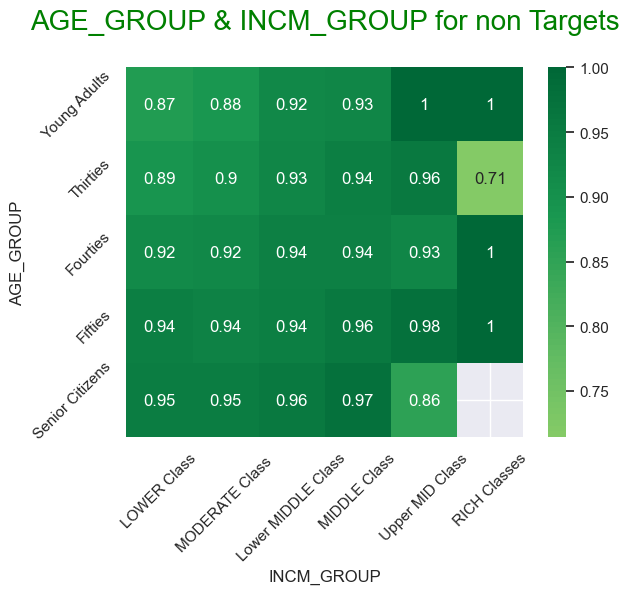

In [256]:
plt.title("AGE_GROUP & INCM_GROUP for non Targets\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
hmap = pd.pivot_table(data=final, index ='AGE_GROUP' , columns='INCM_GROUP', values='nTARGET')
sns.heatmap(hmap, annot=True, cmap='RdYlGn',center=0.427)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### ### 6.2 Corelation wrt NAME_INCOME_TYPE &  AGE_GROUP for non Targets 

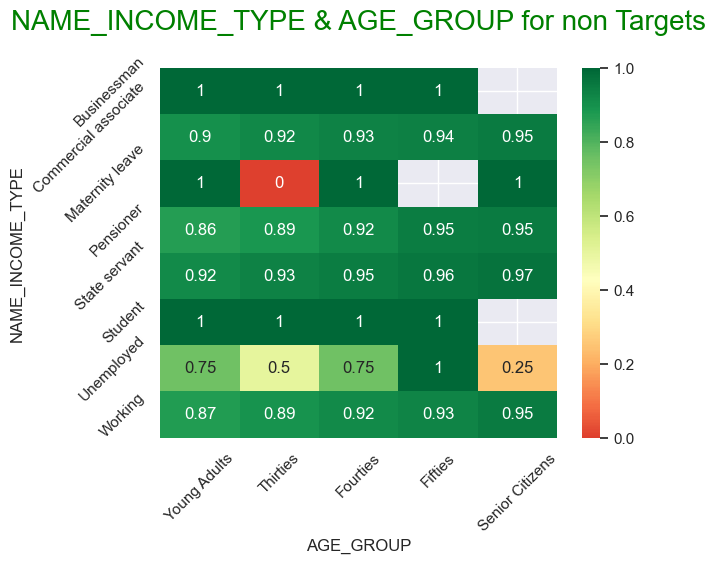

In [257]:
plt.title("NAME_INCOME_TYPE & AGE_GROUP for non Targets\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

hmap = pd.pivot_table(data=final, index ='NAME_INCOME_TYPE' , columns='AGE_GROUP', values='nTARGET')
sns.heatmap(hmap, annot=True, cmap='RdYlGn',center=0.427)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

### ### 6.3 Corelation wrt NAME_INCOME_TYPE &  NAME_CONTRACT_TYPE_y for non Targets 

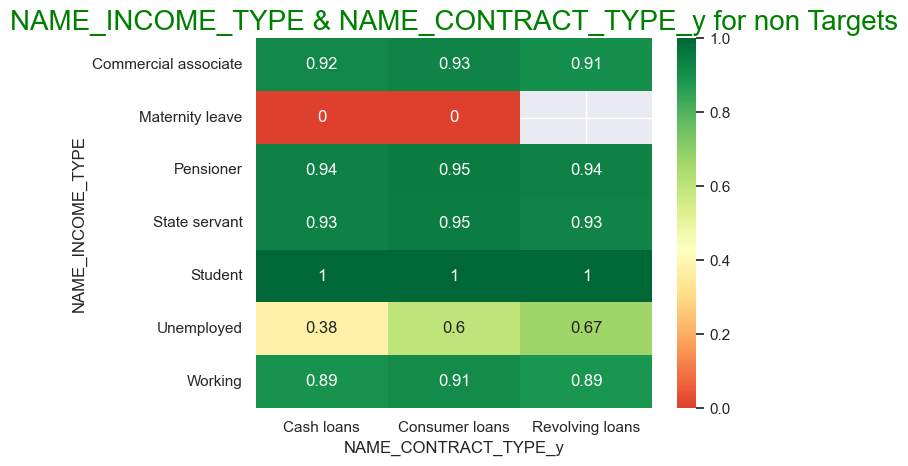

In [258]:
plt.title("NAME_INCOME_TYPE & NAME_CONTRACT_TYPE_y for non Targets", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

hmap = pd.pivot_table(data=final, index ='NAME_INCOME_TYPE' , columns='NAME_CONTRACT_TYPE_y', values='nTARGET')
sns.heatmap(hmap, annot=True, cmap='RdYlGn',center=0.427)
plt.show()

In [259]:
final.groupby('NAME_CONTRACT_STATUS')['NAME_TYPE_SUITE_x'].value_counts()

NAME_CONTRACT_STATUS  NAME_TYPE_SUITE_x
Approved              Unaccompanied        175264
                      Family                28936
                      Spouse, partner        8369
                      Children               2390
                      Other_B                1317
                      Other_A                 620
                      Group of people         194
Canceled              Unaccompanied         30744
                      Family                 4721
                      Spouse, partner        1159
                      Children                382
                      Other_B                 165
                      Other_A                  80
                      Group of people          33
Refused               Unaccompanied         26916
                      Family                 3996
                      Spouse, partner         977
                      Children                268
                      Other_B                 140
          

### 6.4 Heat maps for Loan_status wrt defaulters in OCCUPATION_TYPE for nonTarget

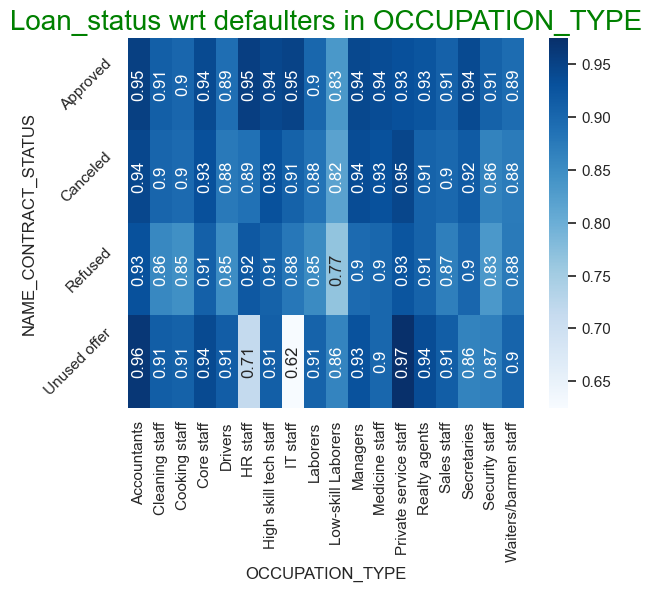

In [260]:
title = 'Loan_status wrt defaulters in OCCUPATION_TYPE'
plt.title(title , fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

hmap = pd.pivot_table(data=final, index ='NAME_CONTRACT_STATUS' , columns='OCCUPATION_TYPE', values='nTARGET')
sns.heatmap(hmap, annot=True, cmap='Blues',annot_kws={'rotation': 90})
plt.yticks(rotation=45)
plt.show()

### Corelation wrt both TARGETS!!! 

In [261]:
groups

['EMP_EXP_GROUP',
 'INCM_GROUP',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE']

### 6.5 Loan_status wrt defaulters in OCCUPATION_TYPE'

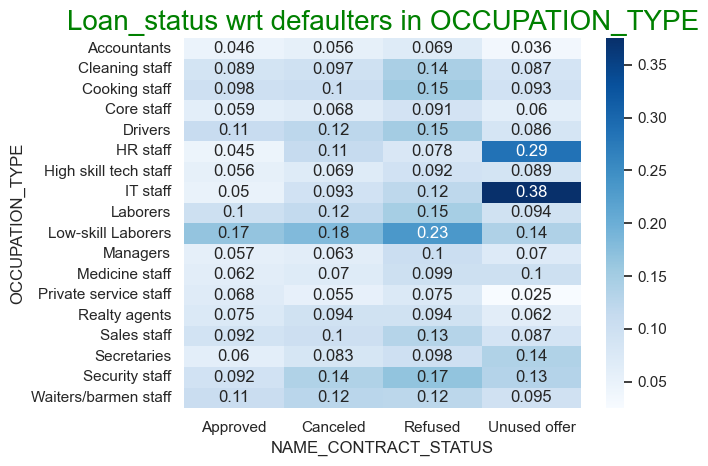

In [262]:
title = 'Loan_status wrt defaulters in OCCUPATION_TYPE'
plt.title(title , fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

hmap = pd.pivot_table(data=final, index ='OCCUPATION_TYPE' , columns='NAME_CONTRACT_STATUS', values='TARGET')
sns.heatmap(hmap, annot=True, cmap='Blues')

plt.show()

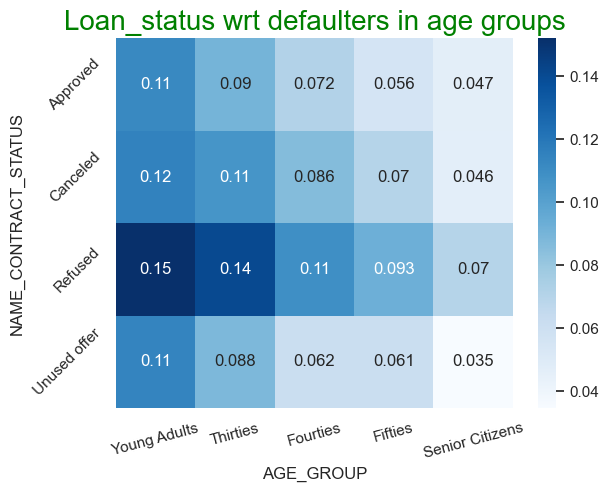

In [263]:
plt.title("Loan_status wrt defaulters in age groups", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

hmap = pd.pivot_table(data=final, index ='NAME_CONTRACT_STATUS' , columns='AGE_GROUP', values='TARGET')
sns.heatmap(hmap, annot=True, cmap='Blues')
plt.yticks(rotation=45)
plt.xticks(rotation=15)
plt.show()

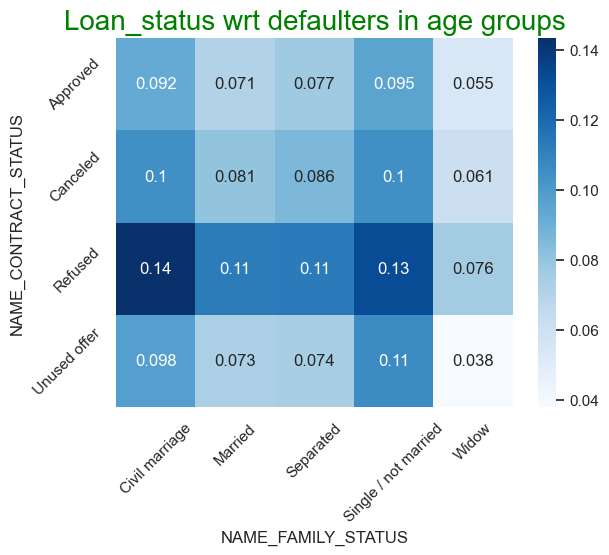

In [264]:
plt.title("Loan_status wrt defaulters in age groups", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

hmap = pd.pivot_table(data=final, index ='NAME_CONTRACT_STATUS' , columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(hmap, annot=True, cmap='Blues')
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

### 6.6 pair plot for --

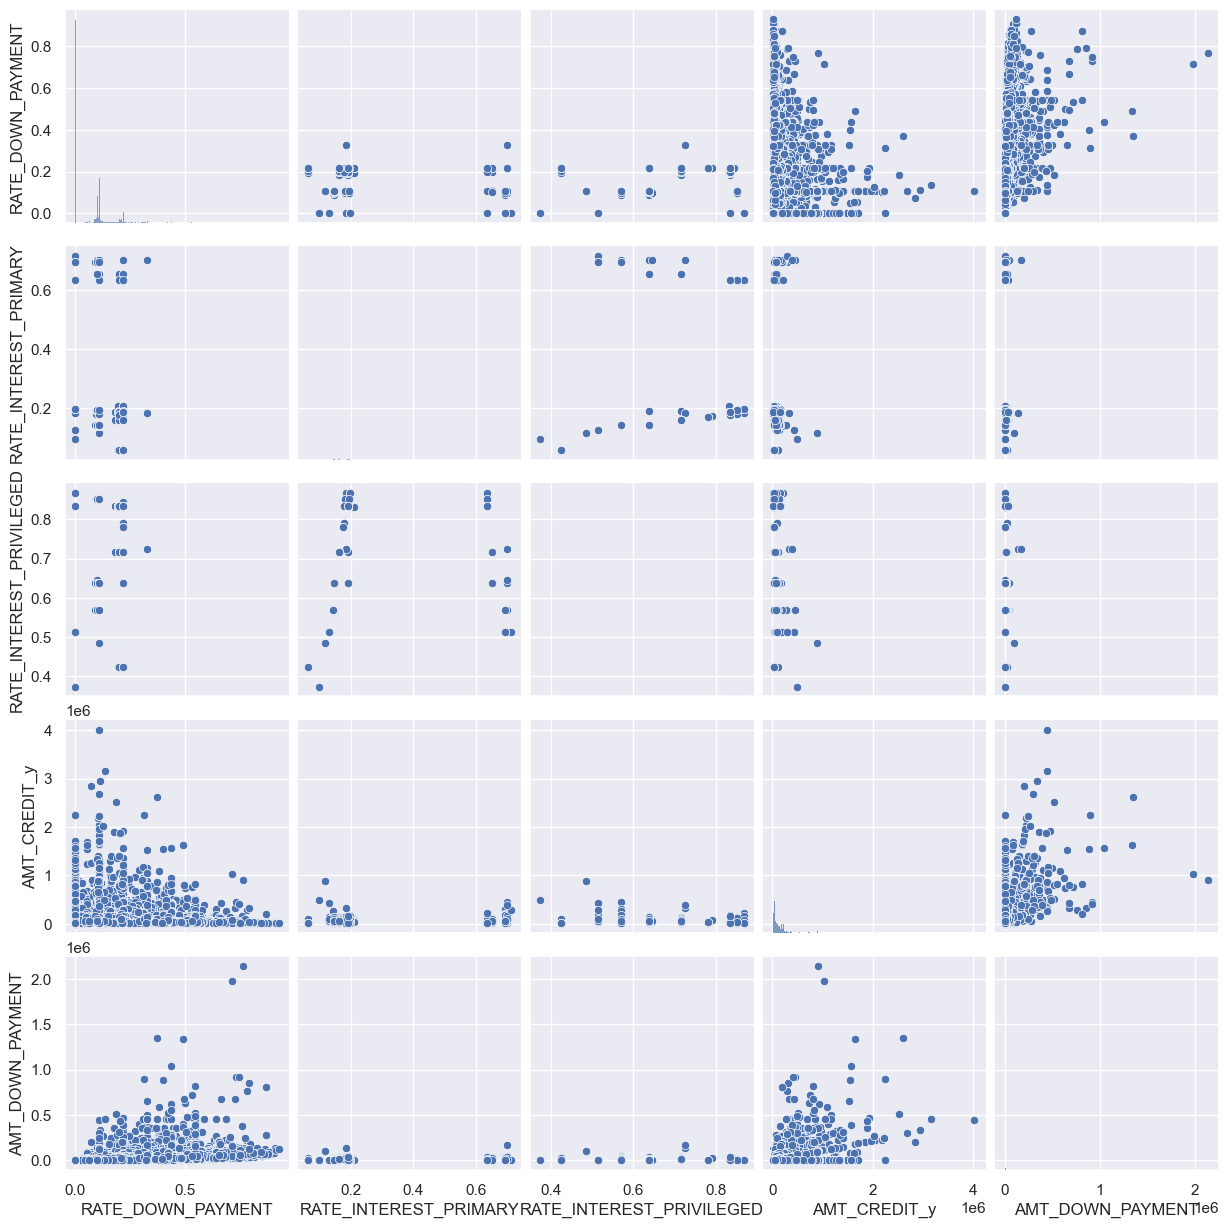

In [265]:
sns.pairplot(final[['RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_CREDIT_y','AMT_DOWN_PAYMENT']])

### Refusal rates

In [266]:
target =  final[(final.TARGET ==1) & (final.NAME_CONTRACT_STATUS== 'Refused')]

<Axes: ylabel='count'>

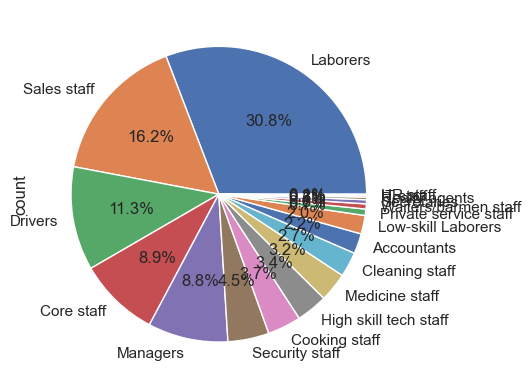

In [267]:
target['OCCUPATION_TYPE'].value_counts().plot.pie(autopct='%1.1f%%')

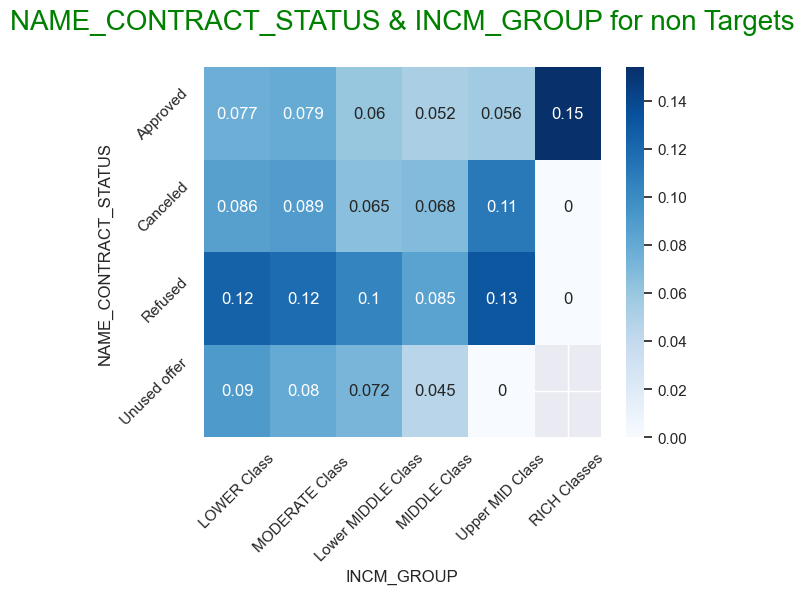

In [268]:
plt.title("NAME_CONTRACT_STATUS & INCM_GROUP for non Targets\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
hmap = pd.pivot_table(data=final, index ='NAME_CONTRACT_STATUS' , columns='INCM_GROUP', values='TARGET')
sns.heatmap(hmap, annot=True, cmap='Blues')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

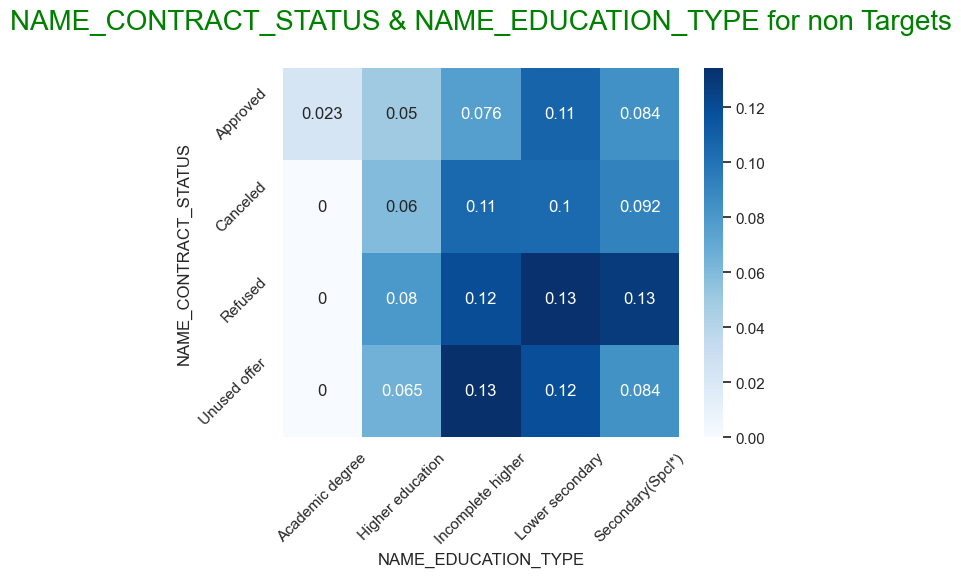

In [269]:
plt.title("NAME_CONTRACT_STATUS & NAME_EDUCATION_TYPE for non Targets\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
hmap = pd.pivot_table(data=final, index ='NAME_CONTRACT_STATUS' , columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(hmap, annot=True, cmap='Blues')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Thanks...